# acceptance factor of (e,e'pp)/(e,e'p) ratio 

# imports

In [1]:
from notebook_tools import *
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from pylab import *
majorLocator   = MultipleLocator(0.01)
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# read data

sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs500000to5018543_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv')

In [2]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs600000to6018605_30SigmaT_5SigmaZa1_5SigmaZa2_5MeanZa1_5MeanZa2_10NRand_results.csv')

In [3]:
ran_eepp_eep = dict({'min_p':0.35,'max_p':0.6,'ratio extrapolated':9.56,'ratio extrapolated err':2.43,'ratio halfed':4.78,'ratio halfed err':1.21})
print 'ran_eepp_eep:\n',ran_eepp_eep
Tp = dict({'C12':0.53,'Al27':0.43,'Fe56':0.34,'Pb208':0.22,'C12err':0.05,'Al27err':0.05,'Fe56err':0.04,'Pb208err':0.03})
Tpp = dict({'C12':0.44,'Al27':0.35,'Fe56':0.26,'Pb208':0.16,'C12err':0.04,'Al27err':0.04,'Fe56err':0.03,'Pb208err':0.02})
Pscx = dict({'C12':0.02,'Al27':0.03,'Fe56':0.04,'Pb208':0.07,'C12err':0.02,'Al27err':0.03,'Fe56err':0.04,'Pb208err':0.06})
print 'transparency\nTp:',Tp,'\nTpp:',Tpp,'\nPscx:',Pscx
sigmap2sigman = 2.5
print 'sigmap2sigman:',sigmap2sigman

ran_eepp_eep:
{'max_p': 0.6, 'ratio extrapolated': 9.56, 'ratio extrapolated err': 2.43, 'min_p': 0.35, 'ratio halfed err': 1.21, 'ratio halfed': 4.78}
transparency
Tp: {'Fe56': 0.34, 'Pb208': 0.22, 'C12err': 0.05, 'Al27': 0.43, 'Fe56err': 0.04, 'Pb208err': 0.03, 'C12': 0.53, 'Al27err': 0.05} 
Tpp: {'Fe56': 0.26, 'Pb208': 0.16, 'C12err': 0.04, 'Al27': 0.35, 'Fe56err': 0.03, 'Pb208err': 0.02, 'C12': 0.44, 'Al27err': 0.04} 
Pscx: {'Fe56': 0.04, 'Pb208': 0.07, 'C12err': 0.02, 'Al27': 0.03, 'Fe56err': 0.04, 'Pb208err': 0.06, 'C12': 0.02, 'Al27err': 0.03}
sigmap2sigman: 2.5


# Contact prediction

In [4]:
contact = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/calculations/eepp_eep_ratio/contact12C.csv')

# histograms of fractions of lost events in each p(miss) bin

In [5]:
PmissBins = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
pmiss_analysis_bins , pmiss_analysis_bins_center , pmiss_multiples_bins , pmiss_bin_center = [] , [] , [] , []
for i in range(len(PmissBins)):
    pmin , pmax = PmissBins[i][0] , PmissBins[i][1]
    for j in range(4):
        pmiss_multiples_bins.append( [ pmin + float(j*(pmax-pmin))/4 , pmin + float((j+1)*(pmax-pmin))/4 ])
    for j in range(2):
        pmiss_analysis_bins.append( [ pmin + float(j*(pmax-pmin))/2 , pmin + float((j+1)*(pmax-pmin))/2 ])

print 'pmiss_multiples_bins:',pmiss_multiples_bins
print 'pmiss_analysis_bins:',pmiss_analysis_bins


for i in range( len(pmiss_multiples_bins) ):
    pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
    pmiss_bin_center.append(0.5*(pmin+pmax))
print 'pmiss_bin_center:',pmiss_bin_center


for i in range( len(pmiss_analysis_bins) ):
    pmin , pmax = pmiss_analysis_bins[i][0] , pmiss_analysis_bins[i][1]
    pmiss_analysis_bins_center.append(0.5*(pmin+pmax))
print 'pmiss_analysis_bins_center:',pmiss_analysis_bins_center


pmiss_multiples_bins: [[0.3, 0.3375], [0.3375, 0.375], [0.375, 0.4125], [0.4125, 0.45], [0.45, 0.47500000000000003], [0.47500000000000003, 0.5], [0.5, 0.525], [0.525, 0.55], [0.55, 0.5750000000000001], [0.5750000000000001, 0.6000000000000001], [0.6000000000000001, 0.625], [0.625, 0.65], [0.65, 0.675], [0.675, 0.7], [0.7, 0.725], [0.725, 0.75], [0.75, 0.8125], [0.8125, 0.875], [0.875, 0.9375], [0.9375, 1.0]]
pmiss_analysis_bins: [[0.3, 0.375], [0.375, 0.45], [0.45, 0.5], [0.5, 0.55], [0.55, 0.6000000000000001], [0.6000000000000001, 0.65], [0.65, 0.7], [0.7, 0.75], [0.75, 0.875], [0.875, 1.0]]
pmiss_bin_center: [0.31875, 0.35625, 0.39375, 0.43125, 0.4625, 0.48750000000000004, 0.5125, 0.5375000000000001, 0.5625, 0.5875000000000001, 0.6125, 0.6375, 0.6625000000000001, 0.6875, 0.7124999999999999, 0.7375, 0.78125, 0.84375, 0.90625, 0.96875]
pmiss_analysis_bins_center: [0.3375, 0.4125, 0.475, 0.525, 0.5750000000000001, 0.625, 0.675, 0.725, 0.8125, 0.9375]


In [6]:
do_plot=False
pmiss_bin_center , loss , loss_err , correction , correction_err = [] , [] , [] , [] , []

if do_plot: figure = plt.figure(figsize=(25,20))
for i in range( len(pmiss_multiples_bins) ):
    pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
    pmiss_bin_center.append(0.5*(pmin+pmax))
    if do_plot:
        ax = figure.add_subplot(5,4,i+1)
        if (i < len(pmiss_multiples_bins)-4 ) :     
            ax.xaxis.set_major_formatter( NullFormatter() )
            ax.xaxis.set_major_locator( majorLocator )
        ax.yaxis.set_major_formatter( NullFormatter() )
        h , bins , patches = plt.hist( sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmax)] , 
                                      weights = sims.PvalTotal_unweighted_12C, bins=np.linspace(0,1,20) , normed=1);
        text(0.02,0.9*h.max(),'%.3f<$p_{miss}$<%.3f'%(pmin , pmax),fontsize=18)
    loss.append(np.average(sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmax)],weights=sims.PvalTotal_unweighted_12C))
    loss_err.append(np.sqrt(np.average( np.square(sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmax)] - loss[-1]) ,weights=sims.PvalTotal_unweighted_12C ) ) )
    correction.append(1./(1-loss[-1]))
    correction_err.append(loss_err[-1]/np.square(1-loss[-1]))


    if do_plot:
        text(0.02,0.75*h.max(),'loss = $%.2f\\pm%.2f$'%(loss[-1],loss_err[-1]),fontsize=18)
        set_axes( ax , '' , '' )
        ax.set_ylim(0,1.05*h.max())
    print 'ploting loss in %.3f<p(miss)<%.3f GeV/c (loss=%.2f , corecction=%.2f)'%(pmin , pmax , loss[-1],correction[-1])

if do_plot:
    subplots_adjust(wspace=0.12,hspace=0)
    figtext(0.4,0.07,"fraction of events loss",fontdict={'fontsize':35})
    figtext(0.08,0.6,"simulated runs weighted by $Pval$ [a.u.]",fontdict={'fontsize':35},rotation=90)
    plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/fractionOfLossIn20PmissBins.pdf')

ploting loss in 0.300<p(miss)<0.338 GeV/c (loss=0.64 , corecction=2.80)
ploting loss in 0.338<p(miss)<0.375 GeV/c (loss=0.61 , corecction=2.57)
ploting loss in 0.375<p(miss)<0.412 GeV/c (loss=0.58 , corecction=2.40)
ploting loss in 0.412<p(miss)<0.450 GeV/c (loss=0.56 , corecction=2.26)
ploting loss in 0.450<p(miss)<0.475 GeV/c (loss=0.54 , corecction=2.17)
ploting loss in 0.475<p(miss)<0.500 GeV/c (loss=0.52 , corecction=2.09)
ploting loss in 0.500<p(miss)<0.525 GeV/c (loss=0.51 , corecction=2.03)
ploting loss in 0.525<p(miss)<0.550 GeV/c (loss=0.49 , corecction=1.98)
ploting loss in 0.550<p(miss)<0.575 GeV/c (loss=0.49 , corecction=1.95)
ploting loss in 0.575<p(miss)<0.600 GeV/c (loss=0.47 , corecction=1.89)
ploting loss in 0.600<p(miss)<0.625 GeV/c (loss=0.46 , corecction=1.87)
ploting loss in 0.625<p(miss)<0.650 GeV/c (loss=0.46 , corecction=1.84)
ploting loss in 0.650<p(miss)<0.675 GeV/c (loss=0.45 , corecction=1.82)
ploting loss in 0.675<p(miss)<0.700 GeV/c (loss=0.44 , corecctio

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2748: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


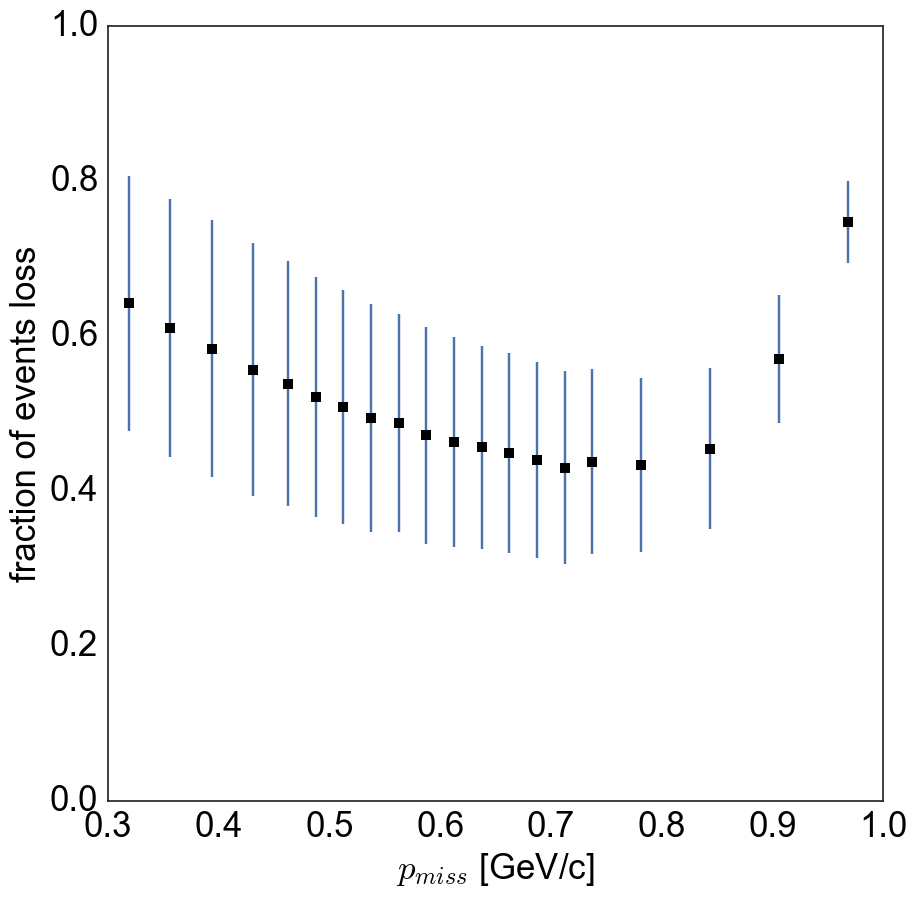

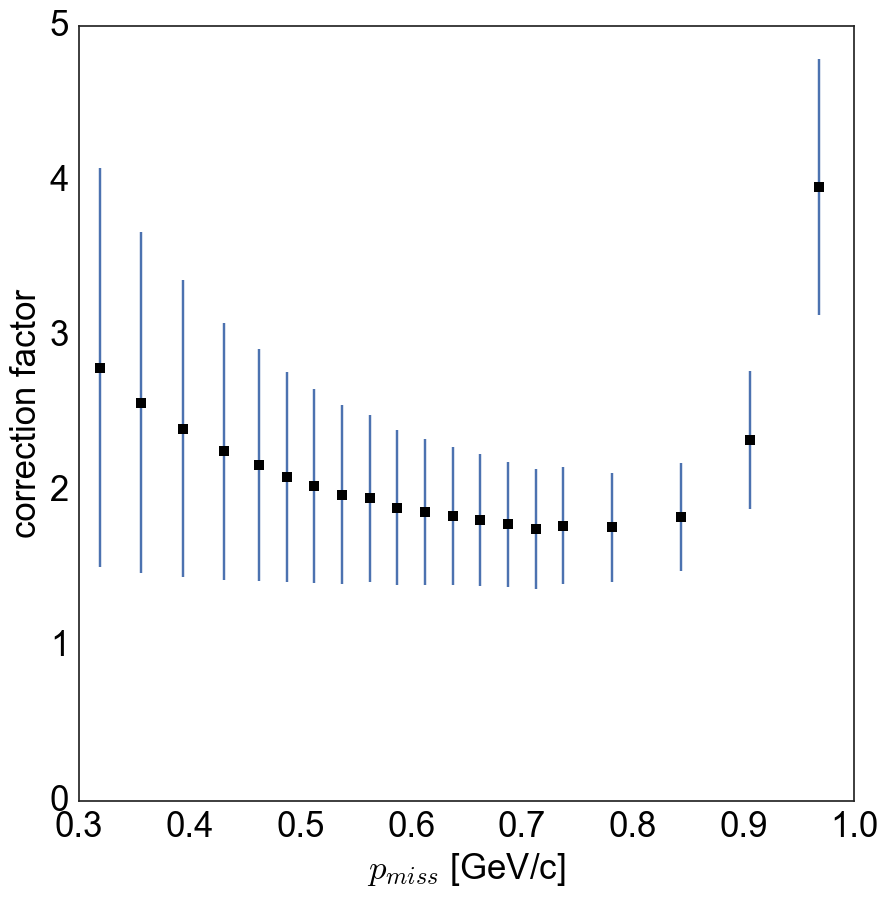

In [7]:
fig,ax=plt.subplots(figsize=(10,10))
plt.plot(pmiss_bin_center,loss, marker='s', color='black' ,linewidth=0)
ax.errorbar(pmiss_bin_center,loss,yerr=loss_err,fmt=None, color='black',error_kw=dict(ecolor='red', lw=2, capsize=5, capthick=2))
ax.set_ylim(0,1)
set_axes(ax,x_label='$p_{miss}$ [GeV/c]',y_label='fraction of events loss')
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/fractionOfLossVsPmiss.pdf')

fig,ax=plt.subplots(figsize=(10,10))
plt.plot(pmiss_bin_center,correction, marker='s', color='black' ,linewidth=0)
ax.errorbar(pmiss_bin_center,correction,yerr=correction_err,fmt=None, color='black',error_kw=dict(ecolor='red', lw=2, capsize=5, capthick=2))
ax.set_ylim(0,5)
set_axes(ax,x_label='$p_{miss}$ [GeV/c]',y_label='correction factor')
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/eepp_eep_correctionVsPmiss.pdf')

pmin,pmid,pmax: 0.3 0.3375 0.375
ploting loss in 0.300<p(miss)<0.375 GeV/c (loss=0.63 , corecction=2.68)
pmin,pmid,pmax: 0.375 0.4125 0.45
ploting loss in 0.375<p(miss)<0.450 GeV/c (loss=0.57 , corecction=2.33)
pmin,pmid,pmax: 0.45 0.475 0.5
ploting loss in 0.450<p(miss)<0.500 GeV/c (loss=0.53 , corecction=2.13)
pmin,pmid,pmax: 0.5 0.525 0.55
ploting loss in 0.500<p(miss)<0.550 GeV/c (loss=0.50 , corecction=2.01)
pmin,pmid,pmax: 0.55 0.575 0.6
ploting loss in 0.550<p(miss)<0.600 GeV/c (loss=0.48 , corecction=1.92)
pmin,pmid,pmax: 0.6 0.625 0.65
ploting loss in 0.600<p(miss)<0.650 GeV/c (loss=0.46 , corecction=1.85)
pmin,pmid,pmax: 0.65 0.675 0.7
ploting loss in 0.650<p(miss)<0.700 GeV/c (loss=0.44 , corecction=1.80)
pmin,pmid,pmax: 0.7 0.725 0.75
ploting loss in 0.700<p(miss)<0.750 GeV/c (loss=0.43 , corecction=1.77)
pmin,pmid,pmax: 0.75 0.8125 0.875
ploting loss in 0.750<p(miss)<0.875 GeV/c (loss=0.44 , corecction=1.80)
pmin,pmid,pmax: 0.875 0.9375 1.0
ploting loss in 0.875<p(miss)<1.

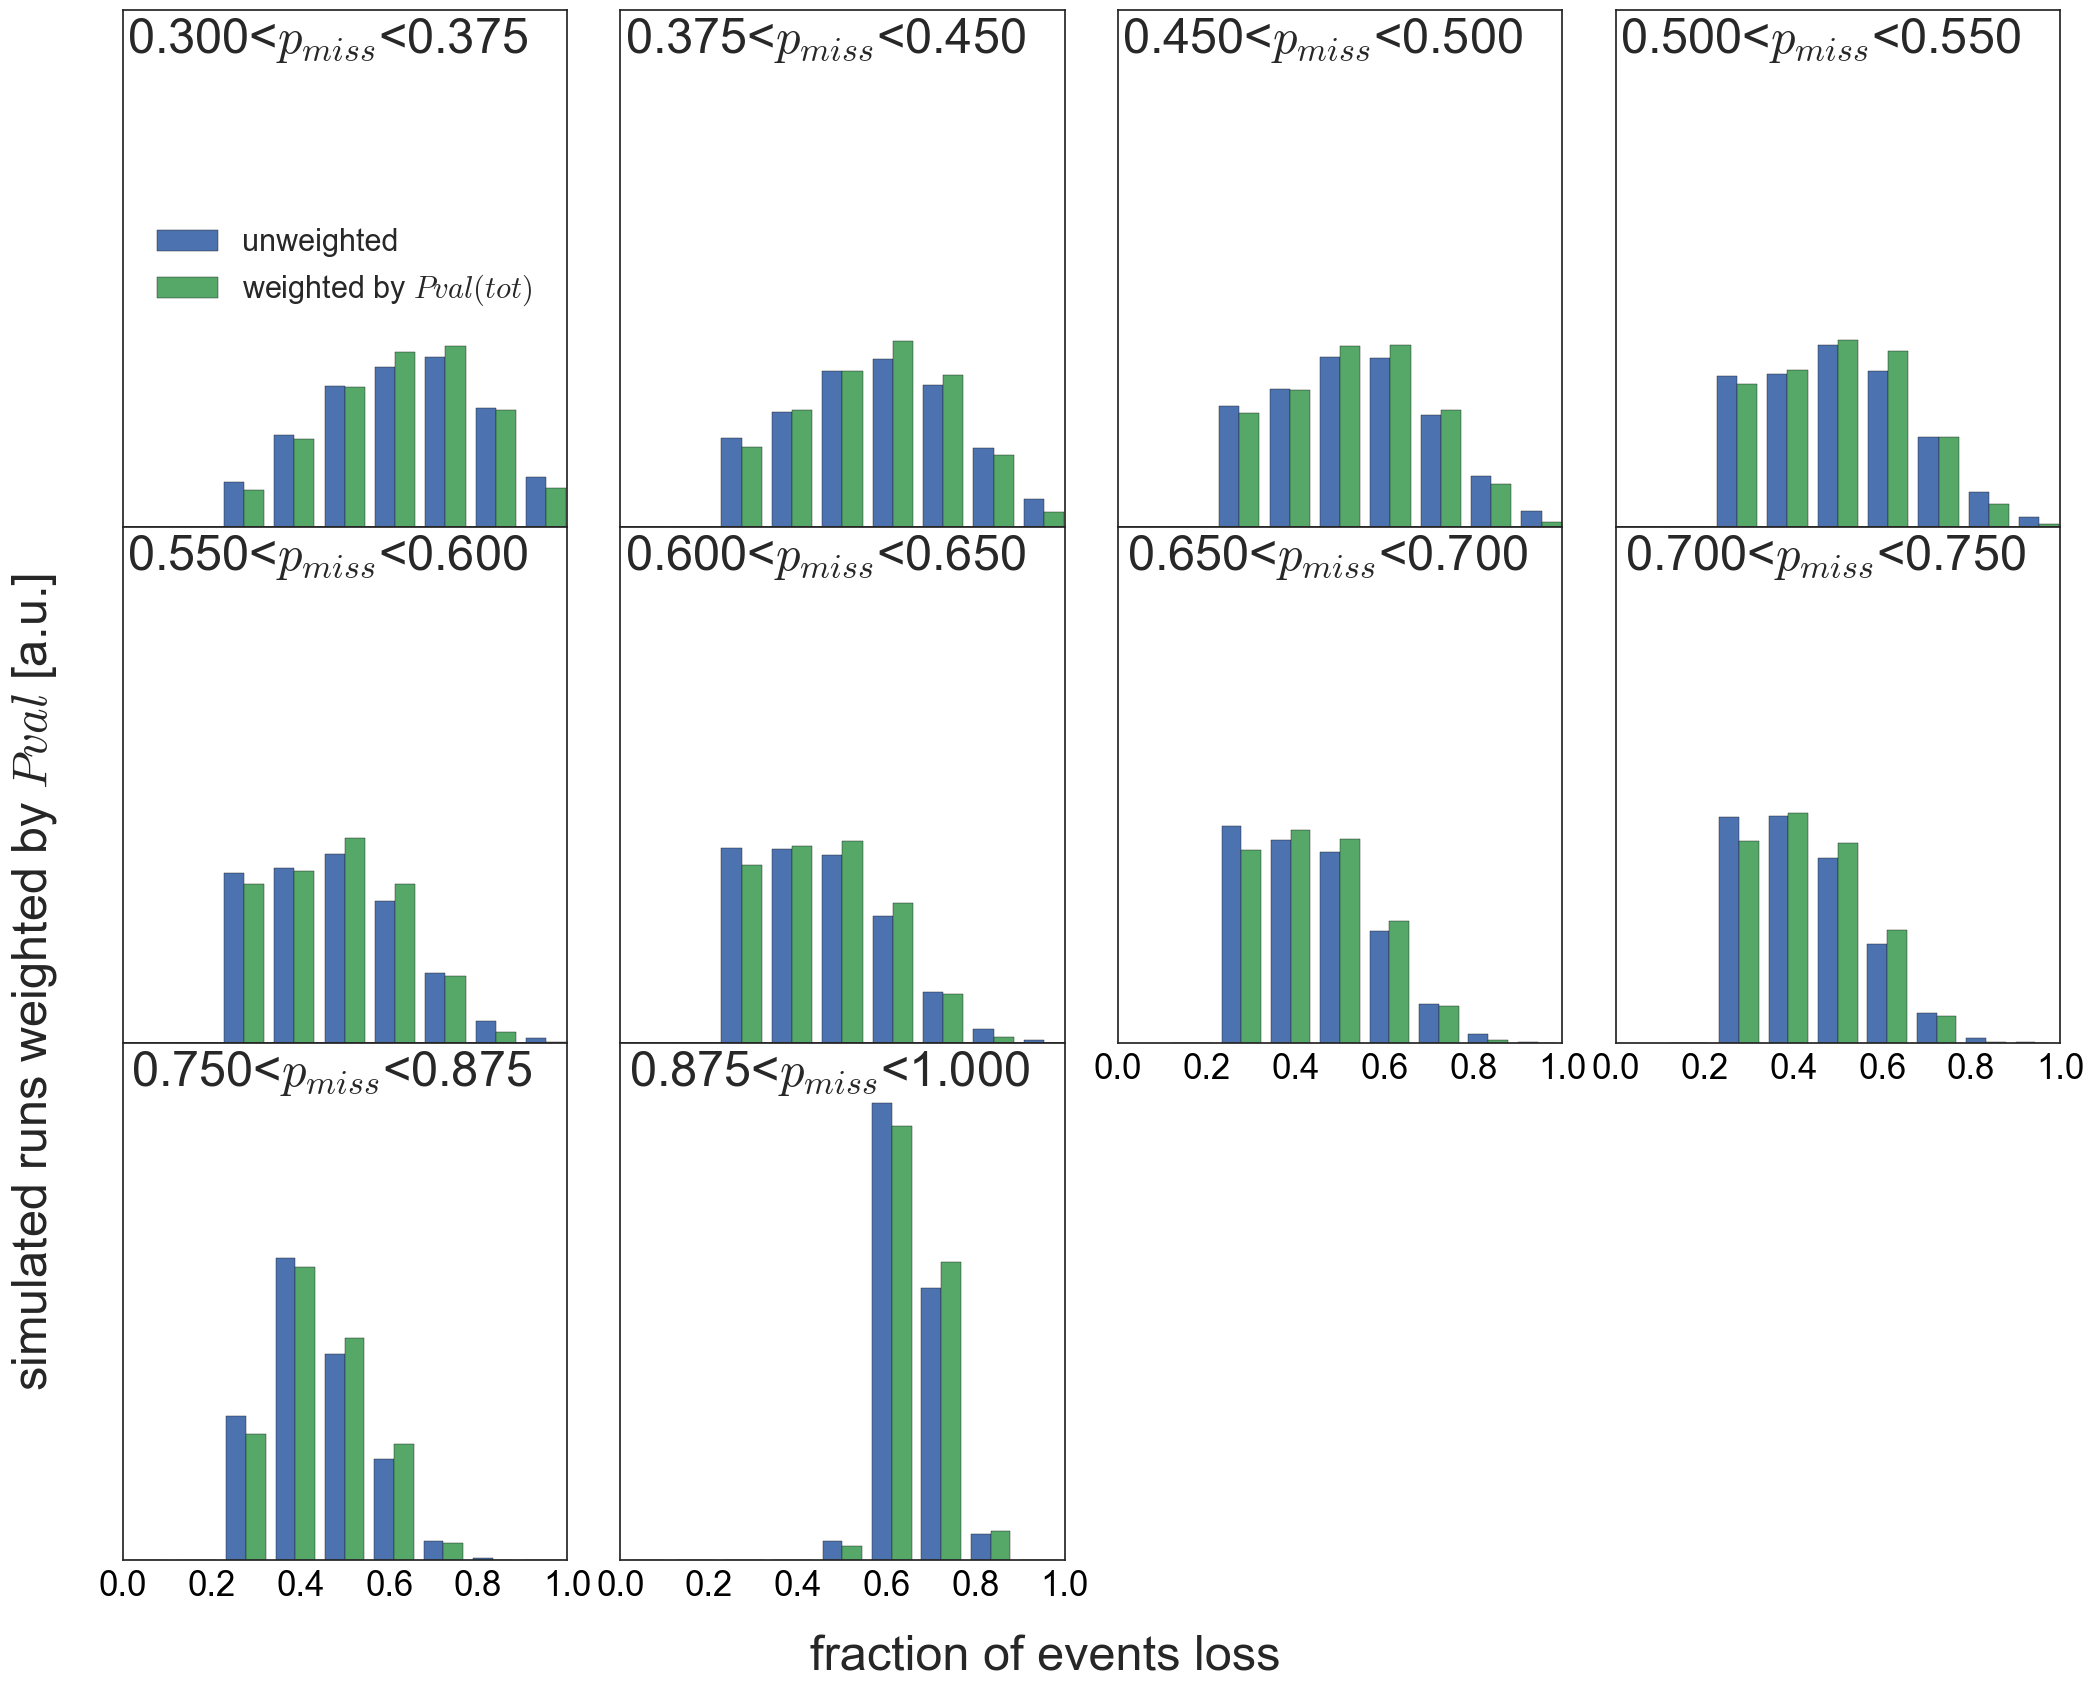

In [8]:
do_plot=True
loss , loss_err , correction , correction_err = [] , [] , [] , [] 
bins=np.linspace(0,1,10)
if do_plot: figure = plt.figure(figsize=(25,20))
for i in range( len(pmiss_analysis_bins) ):
    pmin, pmax = pmiss_analysis_bins[i][0] , pmiss_analysis_bins[i][1]
    pmid = pmin+(pmax-pmin)/2
    print 'pmin,pmid,pmax:',pmin,pmid,pmax
    if do_plot:
        ax = figure.add_subplot(3,4,i+1)
        if (i < len(pmiss_analysis_bins)-4 ) :     
            ax.xaxis.set_major_formatter( NullFormatter() )
            ax.xaxis.set_major_locator( majorLocator )
        ax.yaxis.set_major_formatter( NullFormatter() )
        loss_array = 0.5*(sims['fracLoss_pmiss_%.3f_%.3f'%(pmin , pmid)]+sims['fracLoss_pmiss_%.3f_%.3f'%(pmid , pmax)])
#         h , bins , patches = plt.hist( loss_array, bins=bins , normed=1);
#         hw , bins , patches = plt.hist( loss_array, weights = sims.PvalTotal_unweighted_12C, bins=bins , normed=1);
        plt.hist( [loss_array,loss_array], 
                 weights = [loss_array/loss_array,sims.PvalTotal_unweighted_12C],
                 label=['unweighted','weighted by $Pval(tot)$'],
                 bins=bins , normed=1);

        text(0.02,5.5,'%.3f<$p_{miss}$<%.3f'%(pmin , pmax),fontsize=35)
        if i==0:
            plt.legend(fontsize=22,loc='center')
    loss.append(np.average(loss_array,weights=sims.PvalTotal_unweighted_12C))
    loss_err.append(np.sqrt(np.average( np.square(loss_array - loss[-1]) ,weights=sims.PvalTotal_unweighted_12C ) ) )
    correction.append((1./(1-loss[-1])))
    correction_err.append(loss_err[-1]/np.square(1-loss[-1]))

    if do_plot:
#         text(0.02,0.75*h.max(),'loss = $%.2f\\pm%.2f$'%(loss[-1],loss_err[-1]),fontsize=18)
        set_axes( ax , '' , '' )
        ax.set_ylim(0,6)#1.05*h.max())
    print 'ploting loss in %.3f<p(miss)<%.3f GeV/c (loss=%.2f , corecction=%.2f)'%(pmin , pmax , loss[-1],correction[-1])

if do_plot:
    subplots_adjust(wspace=0.12,hspace=0)
    figtext(0.4,0.07,"fraction of events loss",fontdict={'fontsize':35})
    figtext(0.08,0.6,"simulated runs weighted by $Pval$ [a.u.]",fontdict={'fontsize':35},rotation=90)
    plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/fractionOfLossIn10PmissBins.pdf')

pmiss_analysis_bins_center: [0.3375, 0.4125, 0.475, 0.525, 0.5750000000000001, 0.625, 0.675, 0.725, 0.8125, 0.9375]


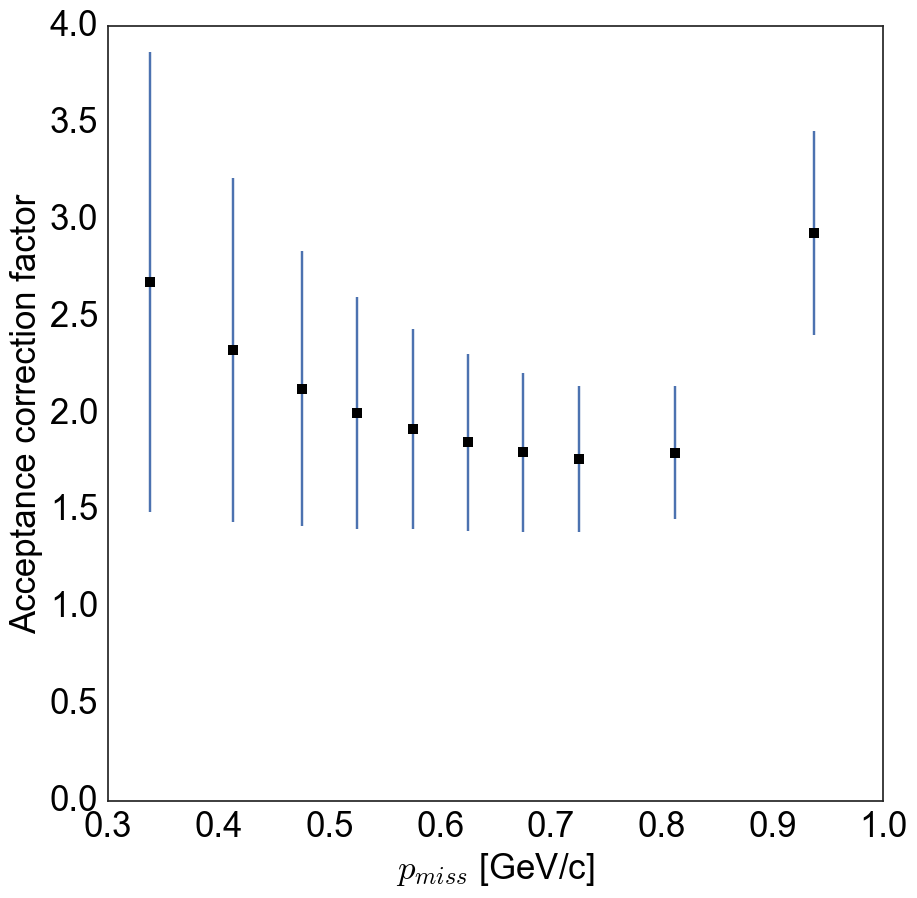

In [9]:
fig,ax=plt.subplots(figsize=(10,10))
print 'pmiss_analysis_bins_center:',pmiss_analysis_bins_center
plt.plot(pmiss_analysis_bins_center,correction, marker='s', color='black' ,linewidth=0)
ax.errorbar(pmiss_analysis_bins_center,correction,yerr=correction_err,fmt=None, color='black',error_kw=dict(ecolor='red', lw=2, capsize=5, capthick=2))
ax.set_ylim(0,4)
set_axes(ax,x_label='$p_{miss}$ [GeV/c]',y_label='Acceptance correction factor')
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/eepp_eep_correctionVsPmiss_10bins.pdf')

# (e,e'pp)/(e,e'p) ratio from DATA before and after acceptance correction

In [10]:
def plot_eepp_eep_ratio(target = 'C12', name = '$^{12}$C', A=12, Z=6,
                        correction=None , pmiss_multiples_bins=None, pmiss_bin_center=None,
                        do_add_contactcurve=False,                                               
                        do_add_uncorrected_data=True,                                               
                        do_add_horizontal_scalar_line=True,
                        do_print = False,
                        do_save_plots=True):
    eep = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_ppSRCCut_DATA_%s.root'%target , 'anaTree')
    eepp = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_DATA_%s.root'%target , 'anaTree')

    pmiss_bin_width  , eep_in_bin , eepp_in_bin , ratio , ratio_err = [] , [] , [] , [] , []
    for i in range( len(pmiss_multiples_bins) ):
        pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
        pmiss_bin_width.append( 0.5*(pmax - pmin) )
        eep_in_bin.append( eep.GetEntries(ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))) )
        eepp_in_bin.append( eepp.GetEntries(ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))) )
        ratio.append(100*float(eepp_in_bin[-1])/eep_in_bin[-1])
        ratio_err.append(ratio[-1] * np.sqrt(1./eepp_in_bin[-1] + 1./eep_in_bin[-1]))
    

    eep.Close()
    eepp.Close()
    
    if do_print:
        print eep_in_bin
        print eepp_in_bin
        print ratio
        print ratio_err



    
    if do_add_uncorrected_data and do_save_plots:
        fig,ax = plt.subplots(figsize=(15,10))
        plt.errorbar(pmiss_bin_center,ratio,xerr=pmiss_bin_width,yerr=ratio_err,fmt='ro', color='black',markersize=20)
        set_axes(ax , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
        ax.grid()
        ax.set_ylim(0,21)
        ax.set_xlim(0.25,1.01)
        fig.savefig('/Users/erezcohen/Desktop/DataMining/AccCorr_ppSRCAnalysisNote/all_figures/eepp_eep_NotCorrectedForAcceptance_%s.pdf'%target)
    
    Tp_Tpp_ratio ,Tp_Tpp_err = Tp[target]/Tpp[target] , Tp[target]/Tpp[target] * sqrt( np.square(Tp[target+'err']/Tp[target])+np.square(Tpp[target+'err']/Tpp[target]) )
    Tpp_Tp_ratio ,Tpp_Tp_err = Tpp[target]/Tp[target] , Tpp[target]/Tp[target] * sqrt( np.square(Tp[target+'err']/Tp[target])+np.square(Tpp[target+'err']/Tpp[target]) )

    ratio_corrected , ratio_corrected_err = [] , [] 
    np2pp_ratio , np2pp_ratio_err = [] , []

    for i in range( len(ratio) ):
        ratio_corrected.append(ratio[i] * correction[i])
        ratio_corrected_err.append( ratio_corrected[-1] * np.sqrt( np.square(ratio_err[i]/ratio[i]) + np.square(correction_err[i]/correction[i]) ))

        R = ratio_corrected[-1]/100.
        R_err = ratio_corrected_err[-1]/100.

        numer = Tpp_Tp_ratio - R
        numer_err = np.sqrt( np.square(Tpp_Tp_err) + np.square(R_err) )
        denom = R - Pscx[target]*Tpp_Tp_ratio/sigmap2sigman 
        denom_err = np.sqrt( np.square(R_err) 
                            + np.square(Pscx[target]*Tpp_Tp_ratio/sigmap2sigman)
                            * np.square(Pscx[target+'err']/Pscx[target]) + np.square(Tpp_Tp_err/Tpp_Tp_ratio)
                           )
        np2pp_ratio.append(2* numer / denom )

        np2pp_ratio_err.append( 0.01*np2pp_ratio[-1] *
                               (np.square(numer_err/(Tpp_Tp_ratio - 0.01*ratio_corrected[-1])) 
                               + np.square(denom_err/(0.01*ratio_corrected[-1] - Pscx[target]*(Tpp_Tp_ratio)/(sigmap2sigman) )) ) )

    if do_save_plots:     
        fig2,ax2 = plt.subplots(figsize=(15,10))
        plt.errorbar(pmiss_bin_center,ratio_corrected,xerr=pmiss_bin_width,yerr=ratio_corrected_err,
                     fmt='ro', color='black',label='This Work',markersize=20)
        set_axes(ax2 , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
        ax2.grid()
        ax2.set_xlim(0.296,1.01)
    
        if target=='C12': 
            # add Ran' ratio
            plt.errorbar(x=[0.5*(ran_eepp_eep['min_p']+ran_eepp_eep['max_p'])],y=[ran_eepp_eep['ratio extrapolated']],
                     xerr=[0.5*(ran_eepp_eep['max_p']-ran_eepp_eep['min_p'])],yerr=[ran_eepp_eep['ratio extrapolated err']],
                     markersize=20, fmt='s', linewidth=4,label='Hall-A',markerfacecolor='none',ecolor='blue')
            plt.scatter(x=[0.5*(ran_eepp_eep['min_p']+ran_eepp_eep['max_p'])],
                        y=[ran_eepp_eep['ratio extrapolated']], 
                        s=500, marker='s', edgecolor='blue', linewidth='3', facecolor='none', hatch='')

            # add the contact curve
            if do_add_contactcurve:
                x = contact['k[GeV/c]']
                numer = 100*Tpp_Tp_ratio*(sigmap2sigman*contact['n_pp'] + Pscx[target]*contact['n_pn'])
                numer_err = numer*np.sqrt( np.square(Tpp_Tp_err/Tpp_Tp_ratio) 
                                          + np.square( np.sqrt(np.square(sigmap2sigman*contact['n_pp_err']) 
                                                               + np.square(Pscx[target]*contact['n_pn'])*(np.square(Pscx[target+'err']/Pscx[target])+np.square(contact['n_pn_err']/contact['n_pn']))) 
                                                      /(sigmap2sigman*contact['n_pp'] + Pscx[target]*contact['n_pn'])) )
                denom = sigmap2sigman*(contact['n_pp']+contact['n_pn'])
                denom_err = sigmap2sigman*np.sqrt(np.square(contact['n_pp_err'])+np.square(contact['n_p_err']))

                y = numer/denom
                y_err = y * np.sqrt( np.square(numer_err/numer) + np.square(denom_err/denom) )
                plt.plot(x,y,color='purple',label='VMC+Contact')
                plt.fill_between(x,y-y_err,y+y_err,color='purple',alpha=0.2)
                y = 100*Tpp_Tp_ratio*contact['n_pp']/(contact['n_pp']+contact['n_pn'])
#             plt.plot(x,y,'--',linewidth=3,label='(VMC+Contact) with Pscx=0')

            # add full scalar dominance line 
        if do_add_horizontal_scalar_line:
            x = contact['k[GeV/c]']
            numer = 100*Tpp_Tp_ratio*(sigmap2sigman + Pscx[target]*4)
            denom = sigmap2sigman*(1+4)
            y = (x/x)*numer/denom
            plt.plot(x,y,'--',linewidth=3,label='Scalar Dominance')


            
        ax2.set_ylim(0.,55)
        plt.legend(loc='best',fontsize=25)
        fig2.savefig('/Users/erezcohen/Desktop/DataMining/AccCorr_ppSRCAnalysisNote/all_figures/eepp_eep_CorrectedForAcceptance_%s.pdf'%target)


    
    if do_save_plots: 
        fig3,ax3 = plt.subplots(figsize=(15,10))
    
        if do_print:
            print 'ratio_corrected:',np.array(ratio_corrected)*0.01
            print 'np2pp_ratio:',np2pp_ratio
            print 'Tpp/Tp:',Tpp_Tp_ratio
            print 'nominal for ratio=0.1:',(2*(Tpp_Tp_ratio-0.1)/(0.1-Pscx[target]*Tpp_Tp_ratio/sigmap2sigman))
            print 'nominal for ratio=0.02:',(2*(Tpp_Tp_ratio-0.02)/(0.02-Pscx[target]*Tpp_Tp_ratio/sigmap2sigman))

        plt.errorbar(pmiss_bin_center,np2pp_ratio,xerr=pmiss_bin_width,yerr=np.abs(np2pp_ratio_err),
                     fmt='ro', color='black',label='This work, '+name,markersize=20)
        set_axes(ax3 , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r"%s ${\frac{np}{pp}}$"%name )
        ax3.grid()
        ax3.set_xlim(0.296,1.01)        
        ax3.set_ylim(1,200)
        ax3.set_yscale('log')
        fig3.savefig('/Users/erezcohen/Desktop/DataMining/AccCorr_ppSRCAnalysisNote/all_figures/pn2pp_%s.pdf'%target)

    return pmiss_bin_center , pmiss_bin_width , ratio_corrected , ratio_corrected_err


[2735, 2086, 1386, 1330, 963, 714, 505, 325, 327, 88]
[15, 56, 62, 81, 62, 70, 45, 51, 45, 11]
[0.5484460694698354, 2.684563758389262, 4.473304473304474, 6.090225563909774, 6.438213914849429, 9.803921568627452, 8.910891089108912, 15.692307692307692, 13.761467889908257, 12.5]
[0.14199595745475269, 0.36352333218785066, 0.5806778768912404, 0.69699322216005133, 0.84356460073671857, 1.2278907668336267, 1.3862786490806012, 2.363491087966032, 2.1880442354711658, 3.9975134316676959]
ratio_corrected: [ 0.01469936  0.0625128   0.09529791  0.12217969  0.12385374  0.18164356
  0.16050745  0.27741365  0.24772731  0.36675712]
np2pp_ratio: [202.40867419662368, 27.480156848434518, 16.578403918452732, 12.255844185430886, 12.052239961432294, 7.4118572361429518, 8.7047365159433845, 4.0829536065053897, 4.8319841631434013, 2.5737932338789706]
Tpp/Tp: 0.830188679245
nominal for ratio=0.1: 15.6426839127
nominal for ratio=0.02: 121.299435028


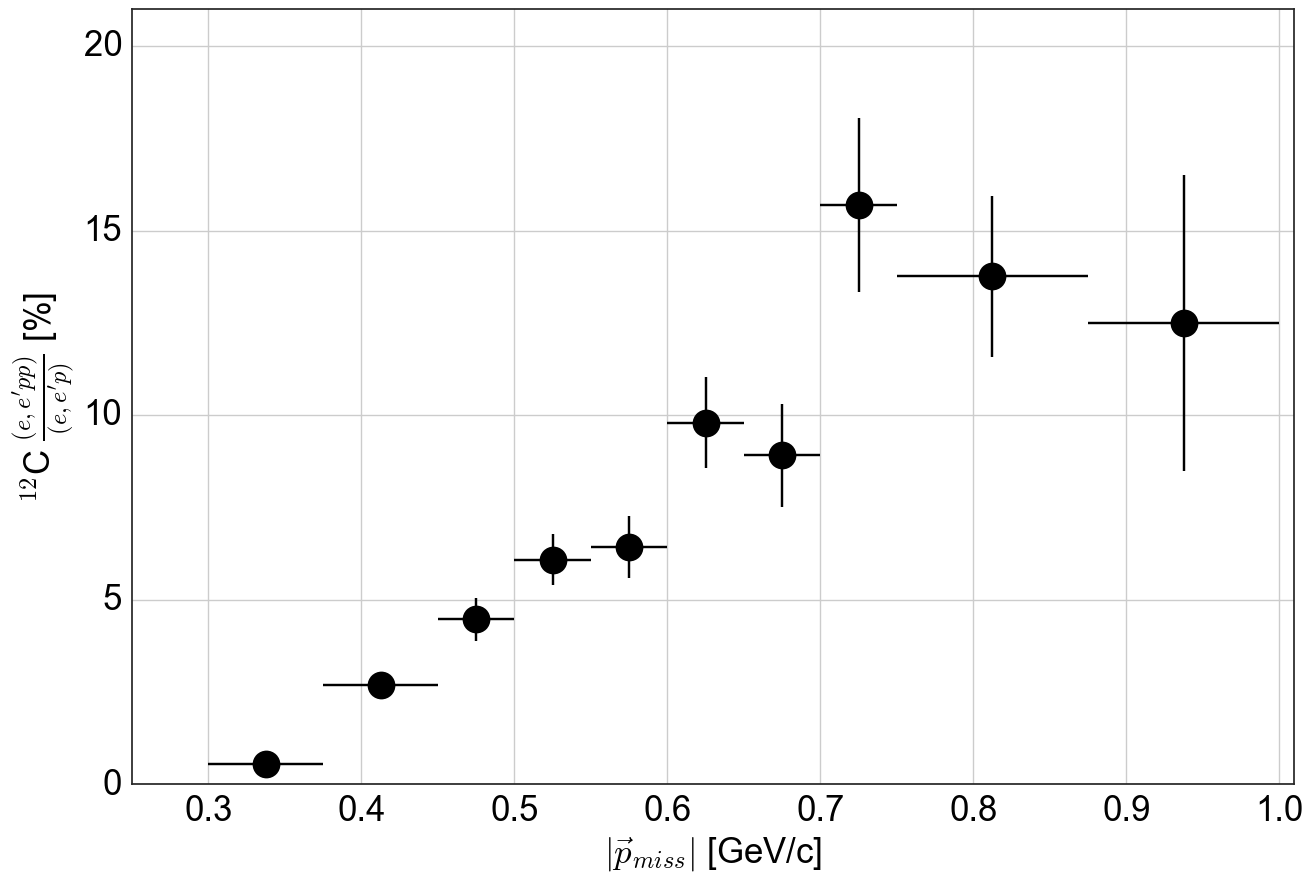

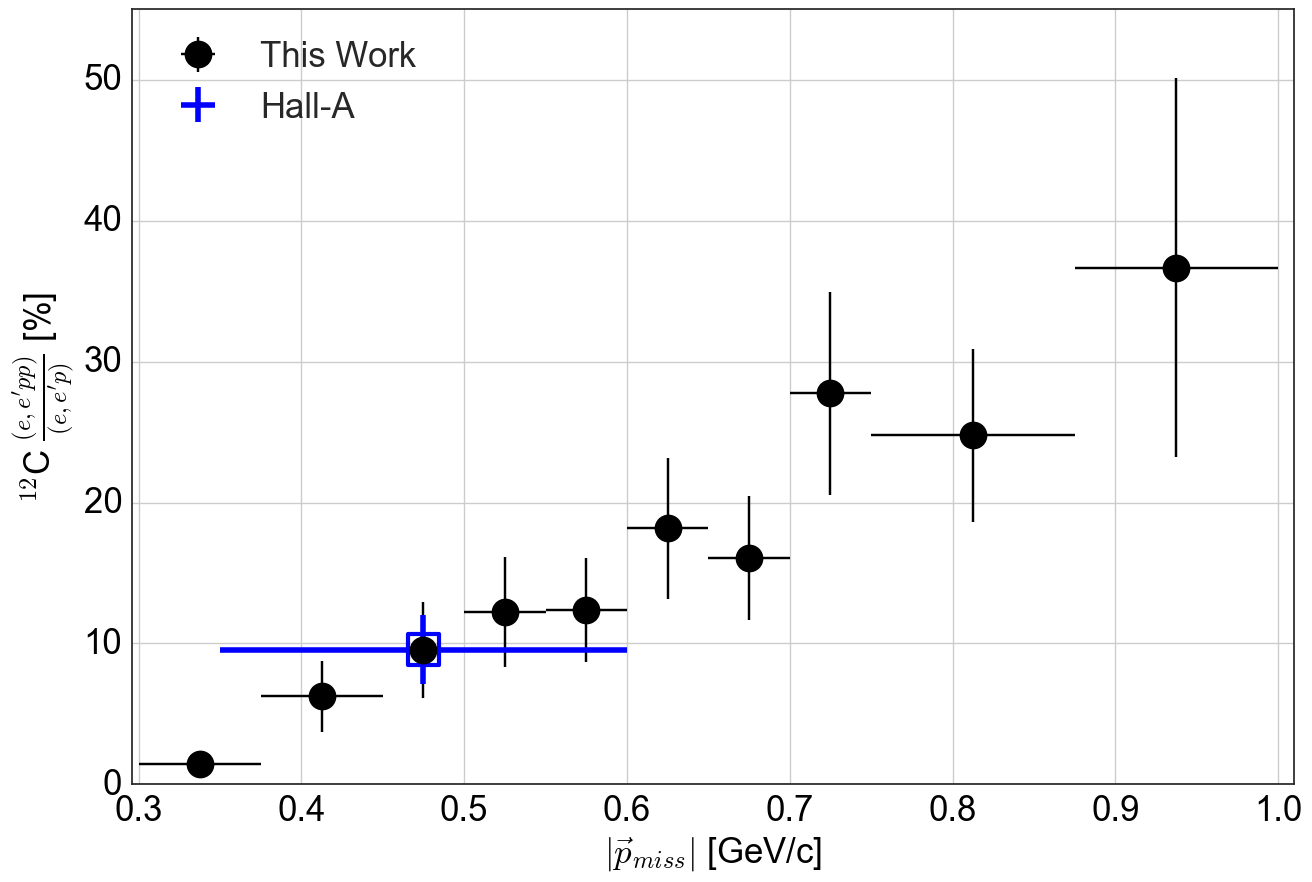

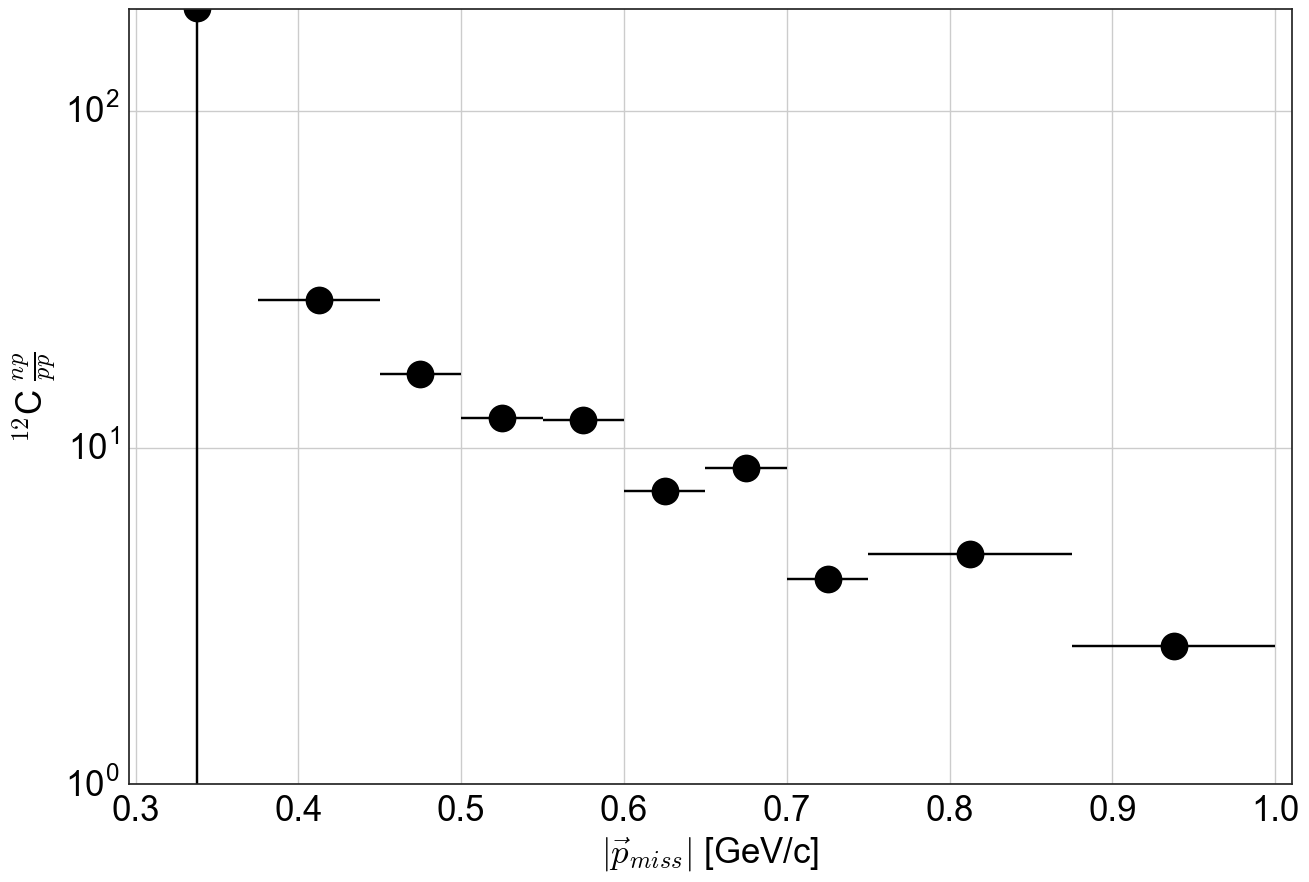

In [12]:
plot_eepp_eep_ratio(target='C12', name='$^{12}$C', 
                    correction=correction ,
                    pmiss_multiples_bins=pmiss_analysis_bins,
                    pmiss_bin_center=pmiss_analysis_bins_center,    
                    do_save_plots=True,
                    do_add_contactcurve=False,
                    do_add_horizontal_scalar_line=False,
                    do_print=True);

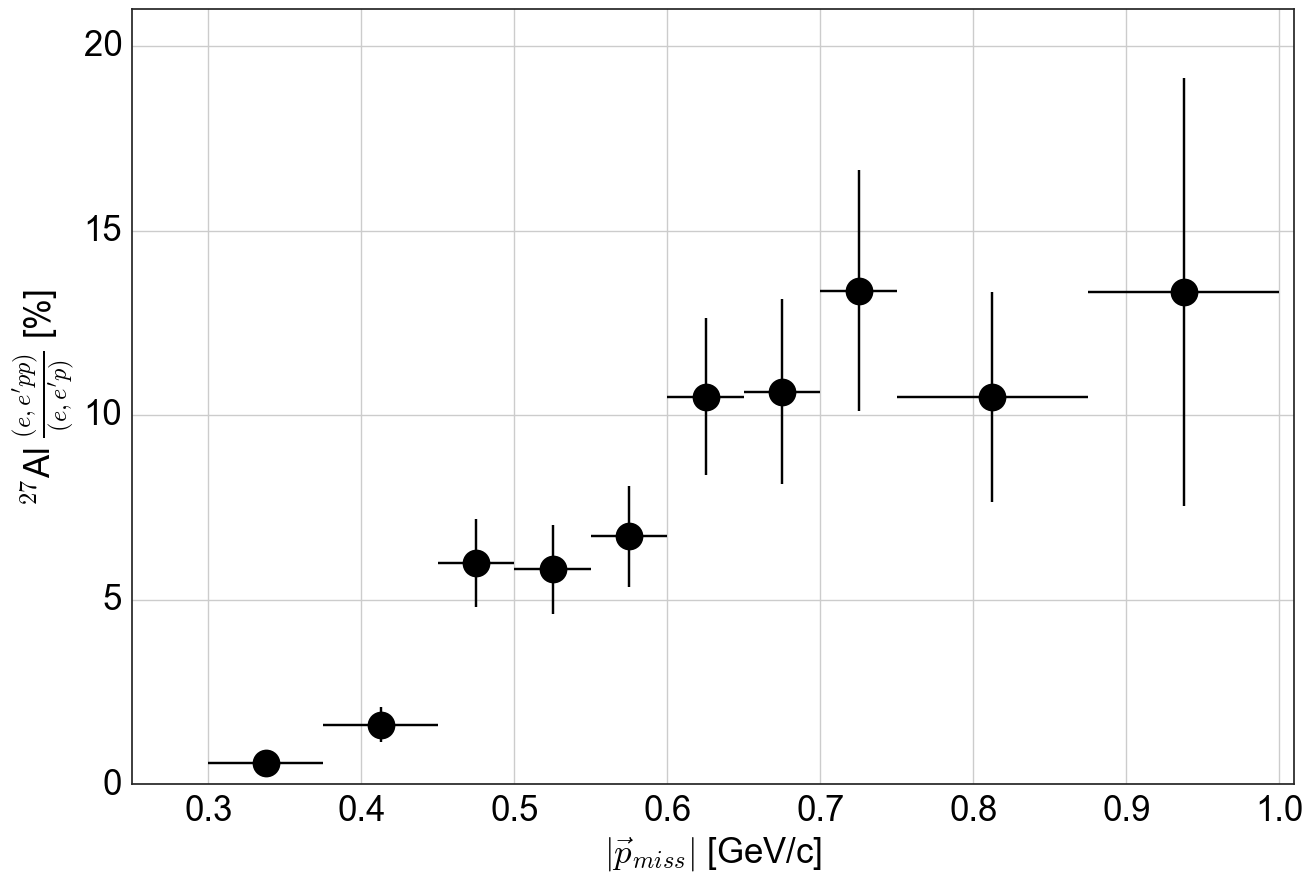

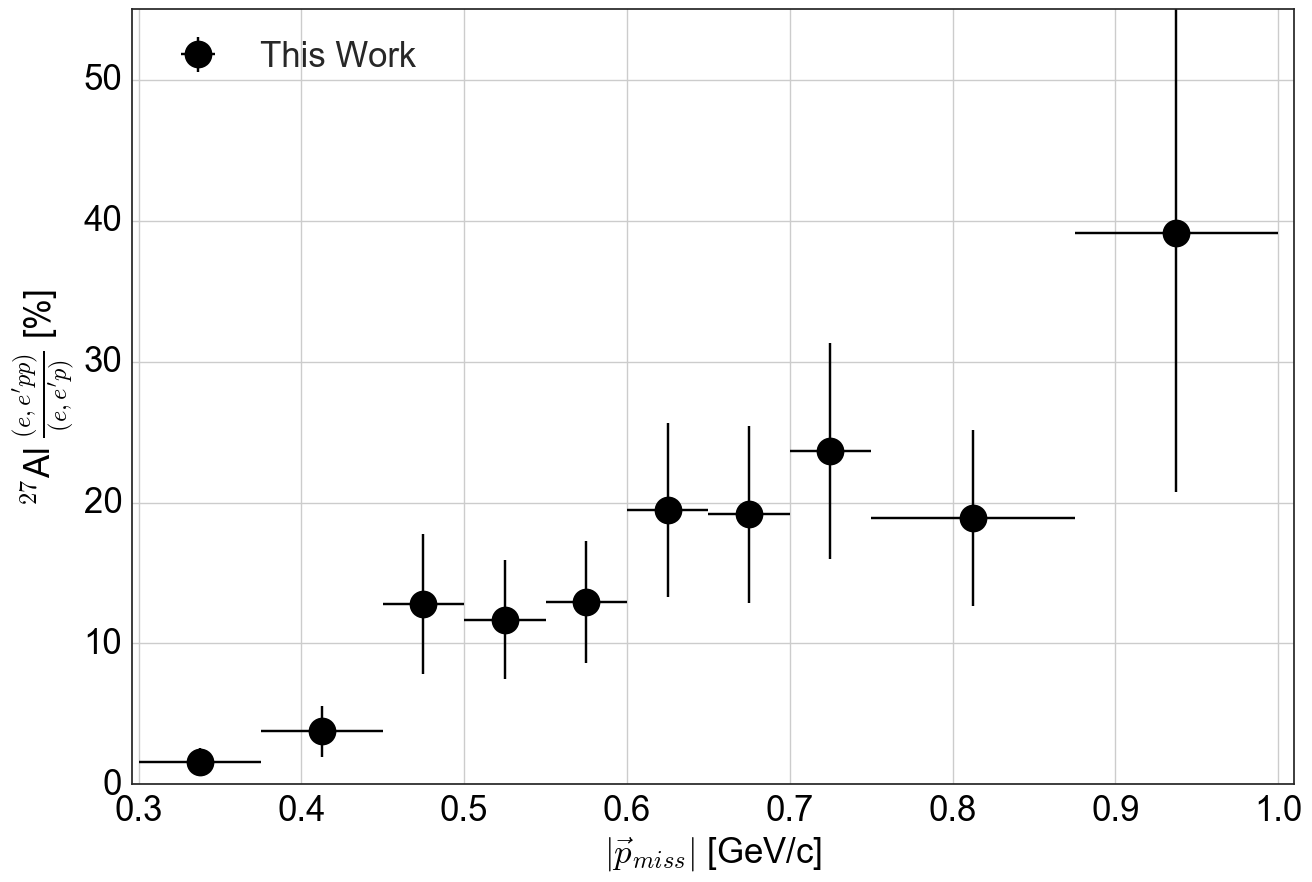

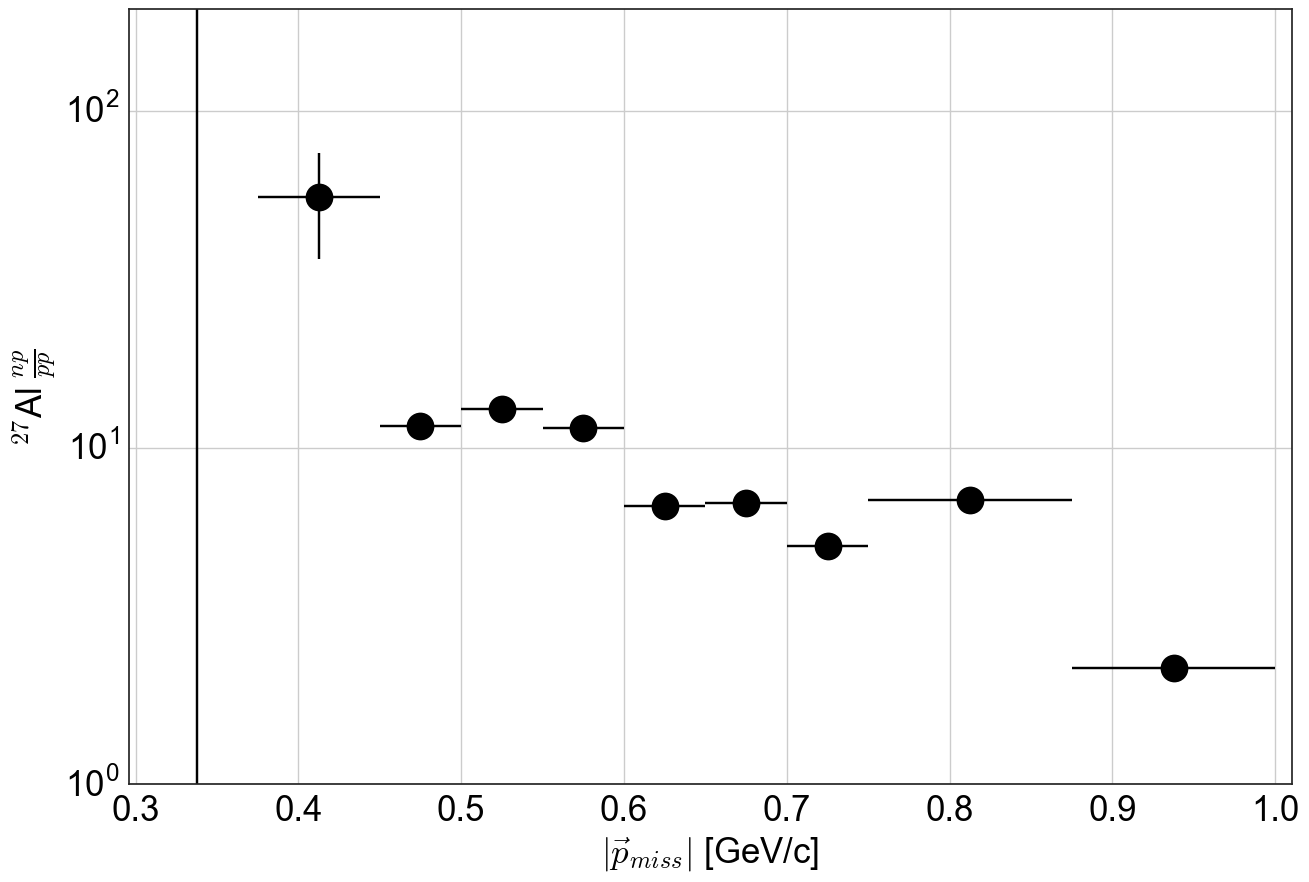

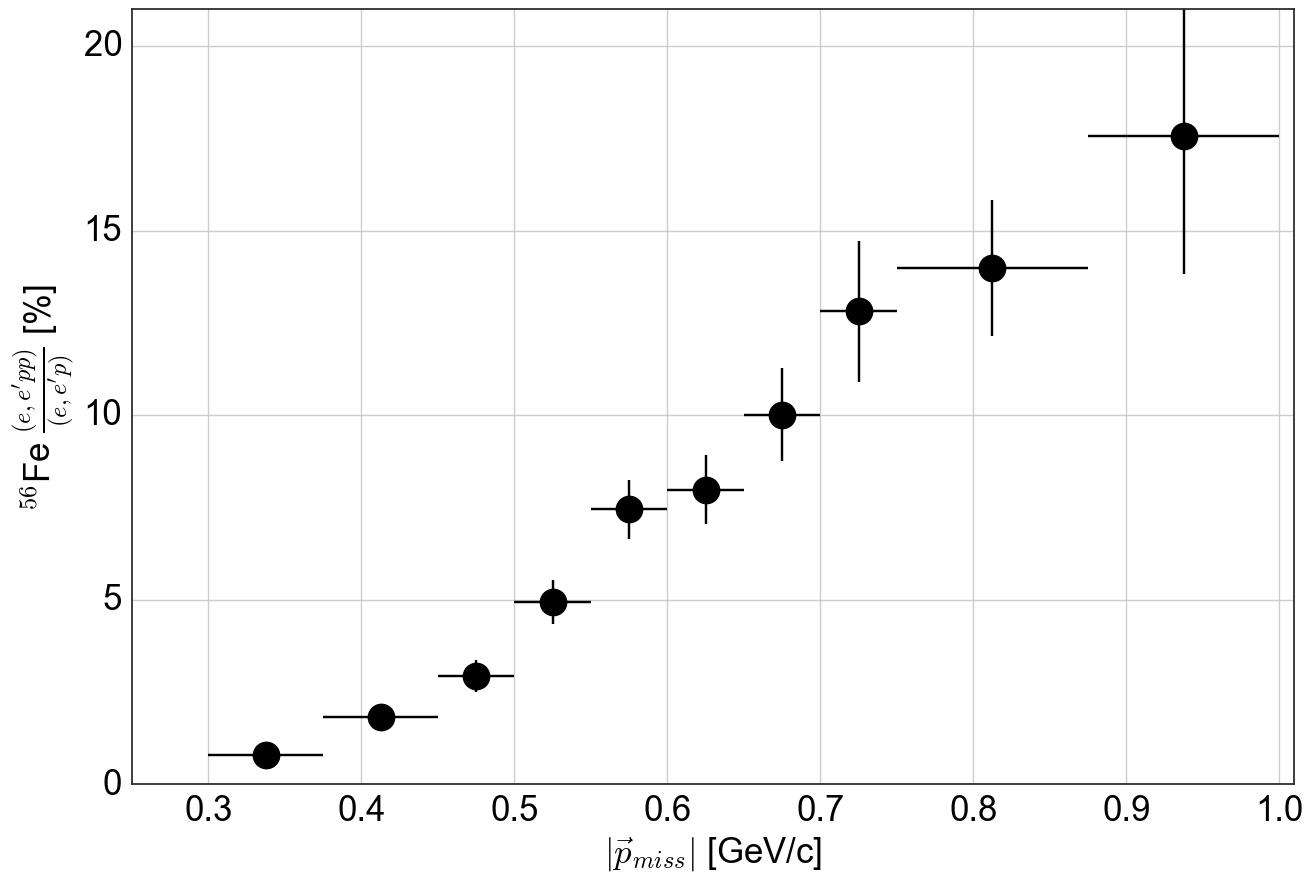

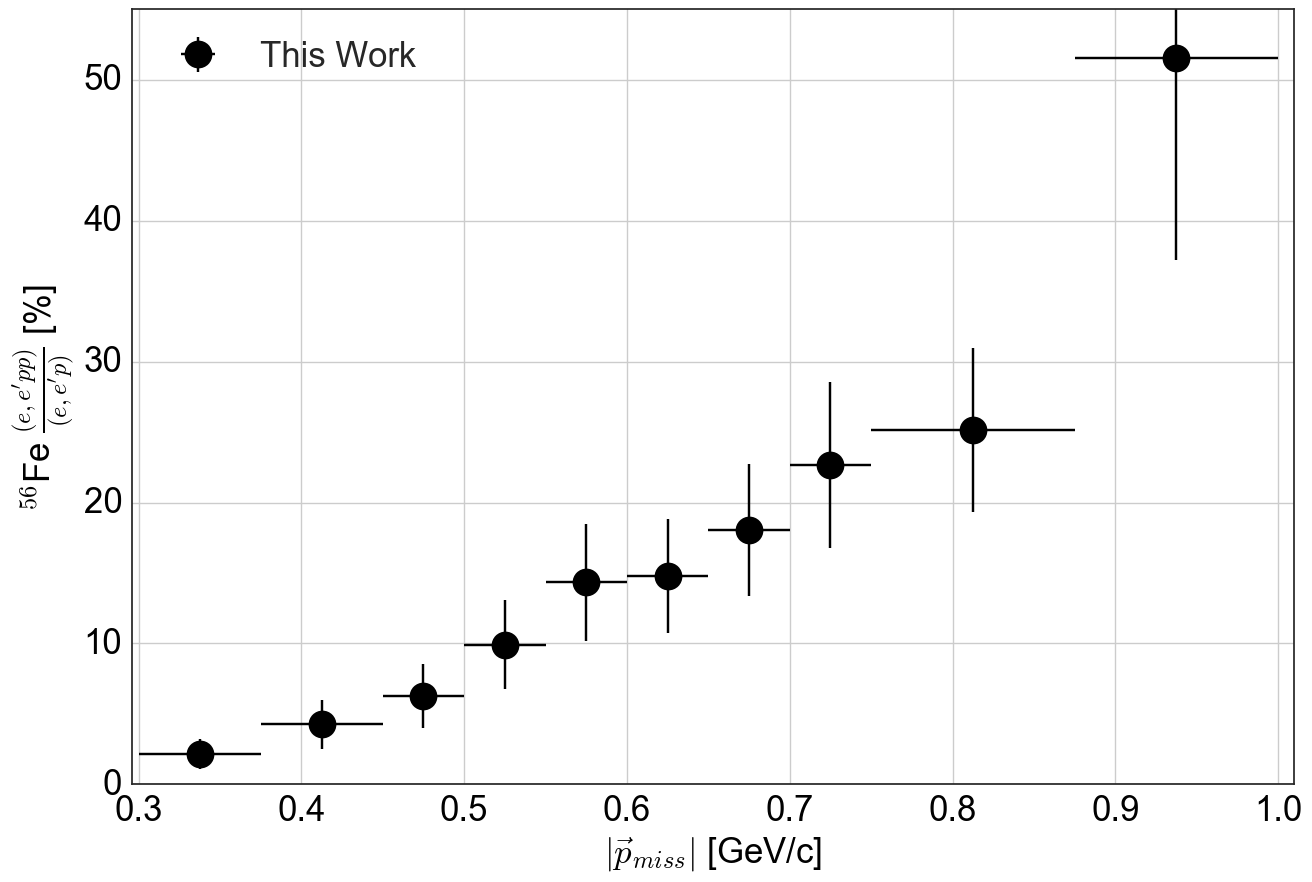

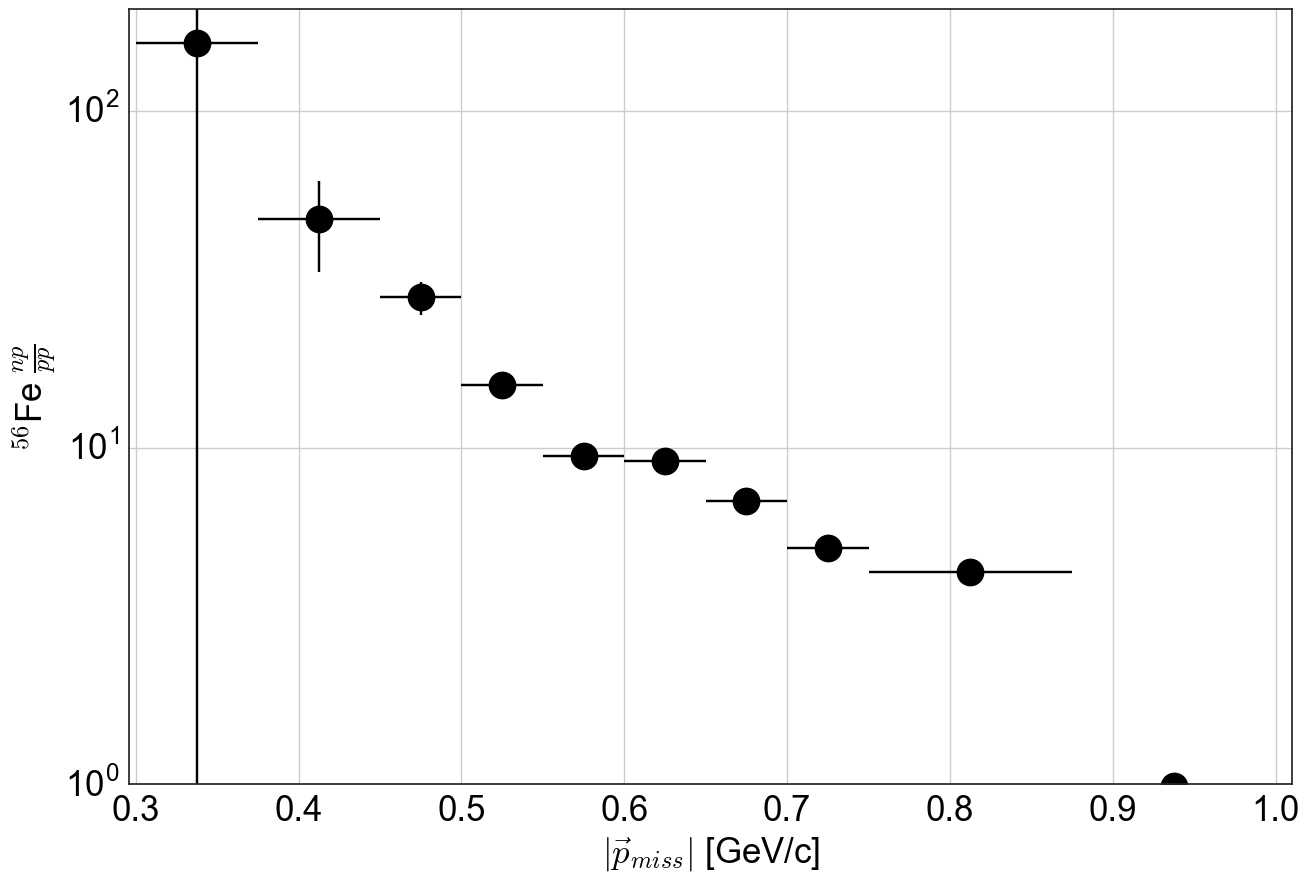

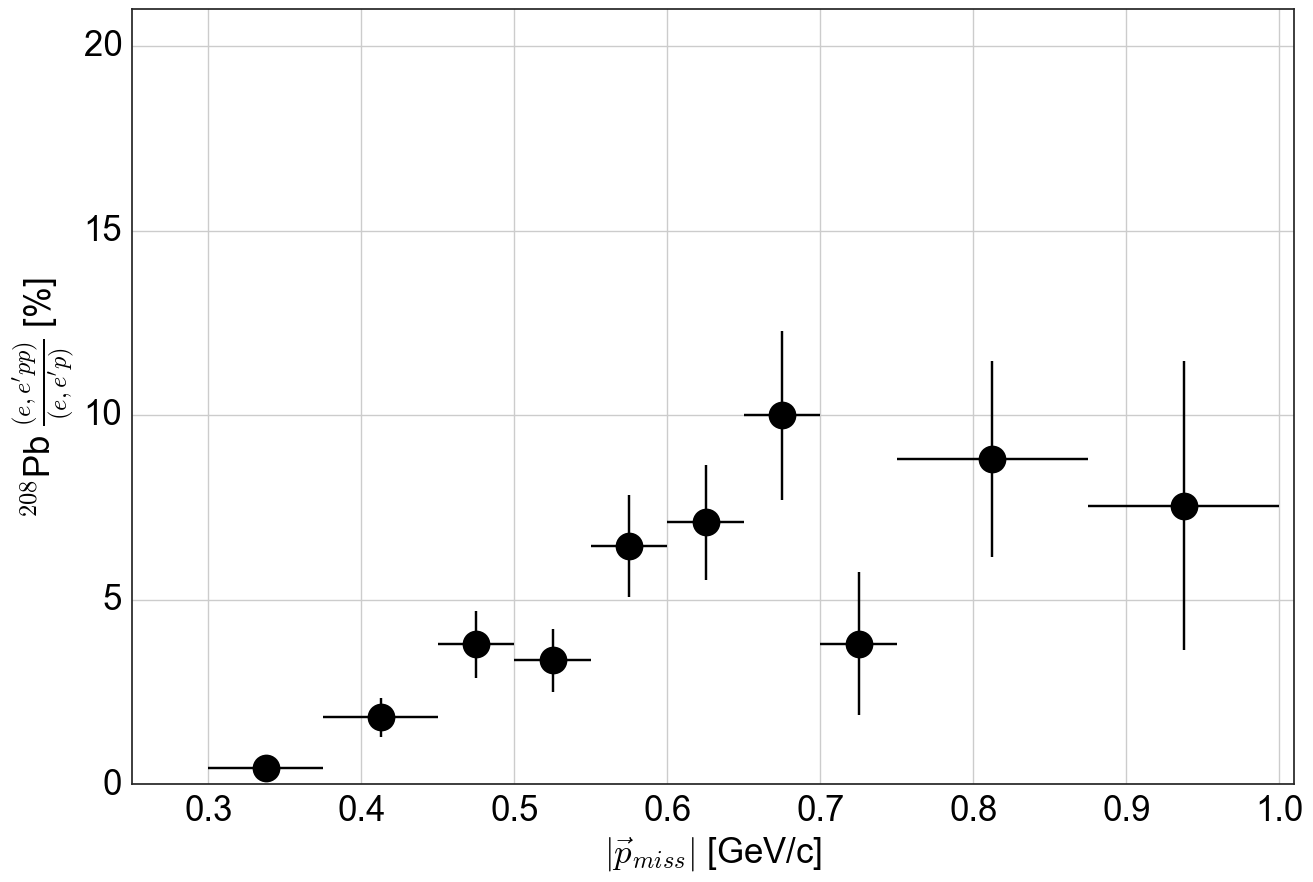

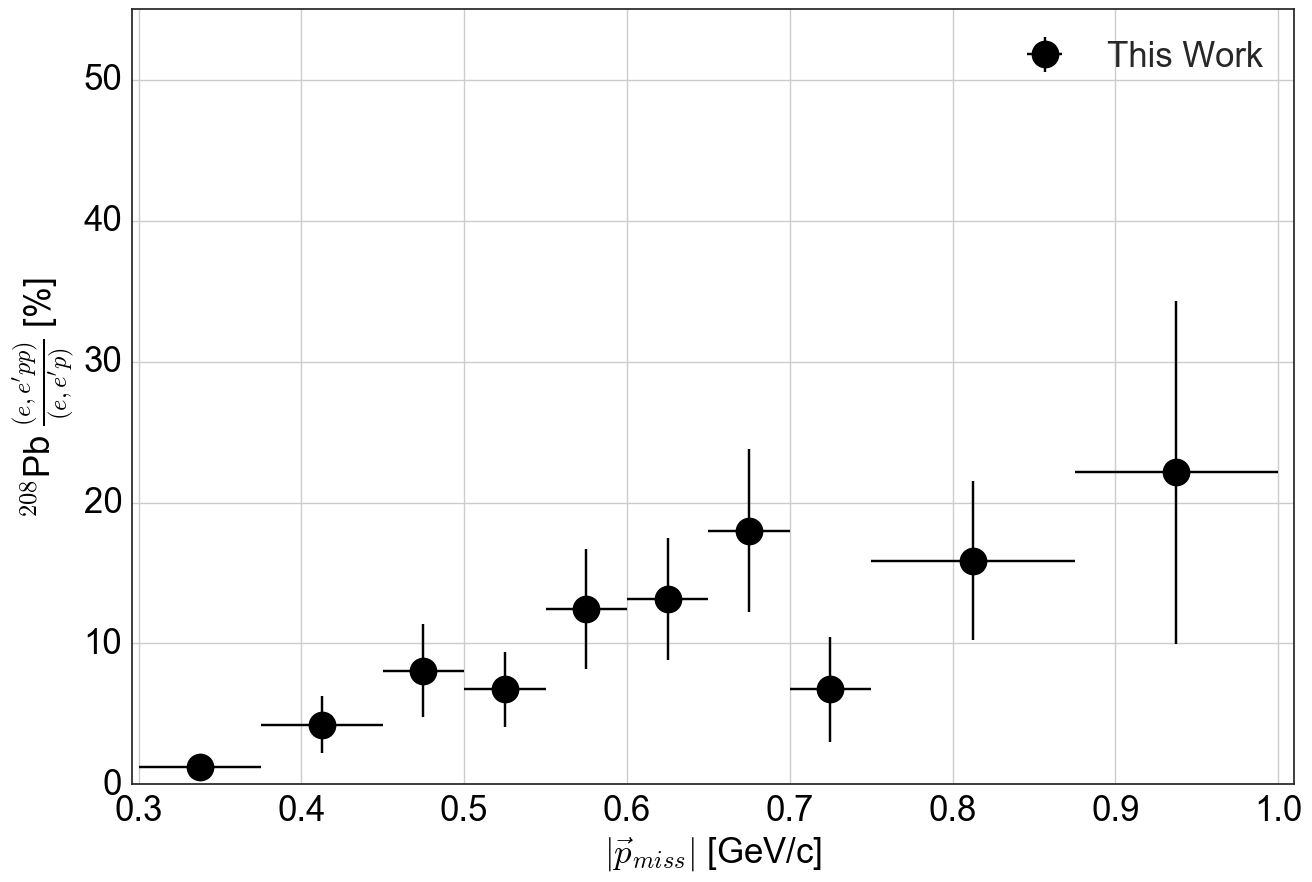

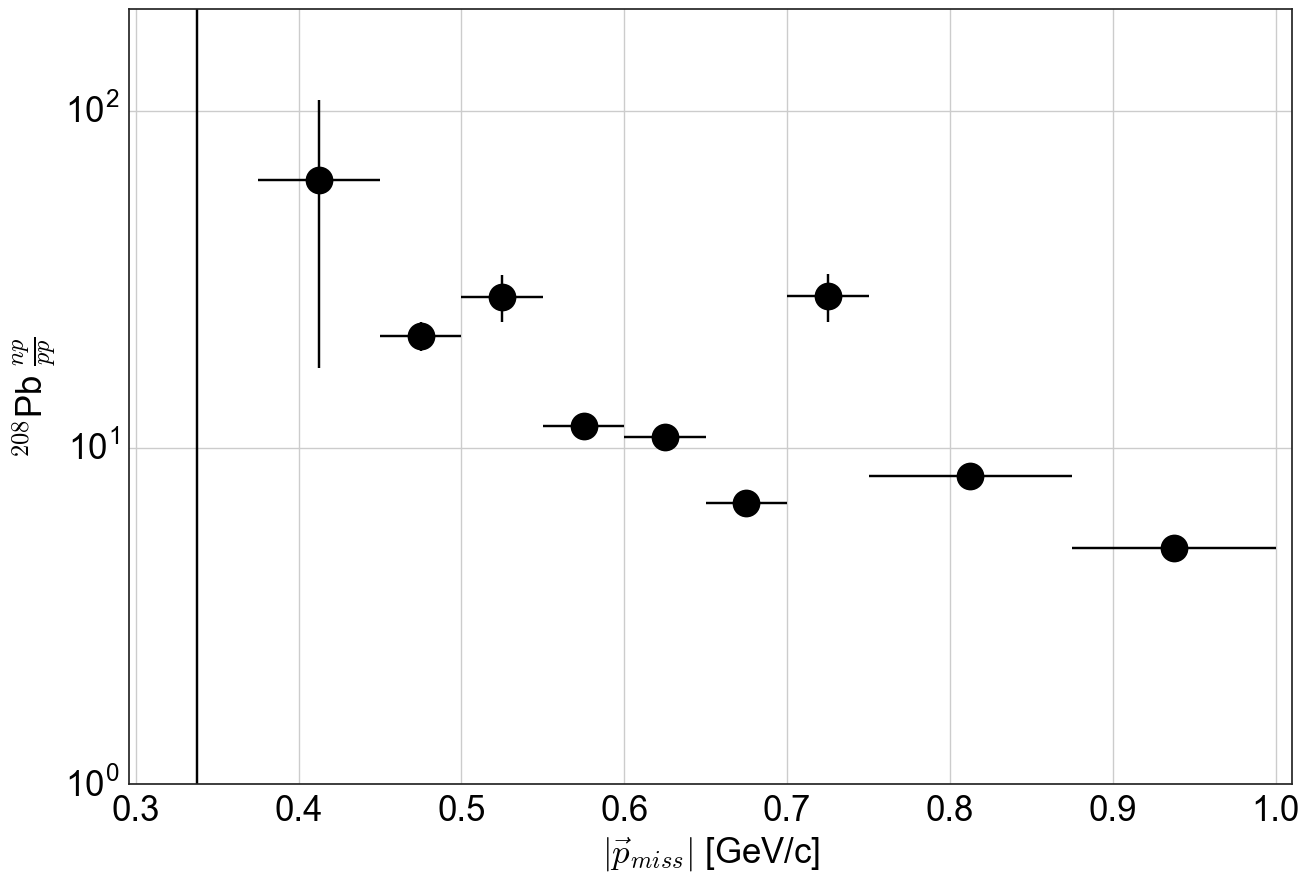

In [14]:
plot_eepp_eep_ratio(target='Al27', name='$^{27}$Al', correction=correction , pmiss_multiples_bins=pmiss_analysis_bins, pmiss_bin_center=pmiss_analysis_bins_center , do_add_horizontal_scalar_line=False);
plot_eepp_eep_ratio(target='Fe56', name='$^{56}$Fe', correction=correction , pmiss_multiples_bins=pmiss_analysis_bins, pmiss_bin_center=pmiss_analysis_bins_center , do_add_horizontal_scalar_line=False);
plot_eepp_eep_ratio(target='Pb208', name='$^{208}$Pb', correction=correction , pmiss_multiples_bins=pmiss_analysis_bins, pmiss_bin_center=pmiss_analysis_bins_center , do_add_horizontal_scalar_line=False);

# in bins of Q2 and p(miss)

In [16]:
Q2Bins = [[0,1.5] , [1.5,2], [2,2.5], [2.5,6]]
PmissBins = [[0.3,0.45] , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
Q2_bin_center = [] 
for j in range( len(Q2Bins) ):
    Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]
    Q2_bin_center.append(0.5*(Q2min+Q2max))
print 'Q2_bin_center:',Q2_bin_center

Q2_bin_center: [0.75, 1.75, 2.25, 4.25]


In [17]:
do_plot=False
loss_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_multiples_bins) ))
loss_err_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_multiples_bins) ))
correction_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_multiples_bins) ))
correction_err_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_multiples_bins) ))

for j in range( len(Q2Bins) ):
    Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]

    if do_plot:figure = plt.figure(figsize=(25,20))
    for i in range( len(pmiss_multiples_bins) ):
        pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
        if do_plot:
            ax = figure.add_subplot(5,4,i+1)
            if (i < len(pmiss_multiples_bins)-4 ) :     
                ax.xaxis.set_major_formatter( NullFormatter() )
                ax.xaxis.set_major_locator( majorLocator )
            ax.yaxis.set_major_formatter( NullFormatter() )
        
        array = sims['fracLoss_pmiss_%.3f_%.3f_Q2bin_%.1f_%.1f'%(pmin , pmax , Q2min , Q2max)]
        weights = sims.PvalTotal_unweighted_12C
        if do_plot: 
            h , bins , patches = plt.hist( array, weights = weights, bins=np.linspace(0,1,20) , normed=1);
            
        loss_q2pm[j][i] = np.average(array , weights=weights)
        loss_err_q2pm[j][i] = np.sqrt(np.average( np.square(array - loss_q2pm[j][i]) , weights=weights) ) 
        correction_q2pm[j][i] = 1./(1-loss_q2pm[j][i])
        correction_err_q2pm[j][i] = loss_err_q2pm[j][i]/np.square(1-loss_q2pm[j][i])

        if do_plot:
            text(0.02,0.9*h.max(),'%.3f<$p_{miss}$<%.3f'%(pmin , pmax),fontsize=18)
            text(0.02,0.75*h.max(),'loss = $%.2f\\pm%.2f$'%(loss_q2pm[j][i],loss_err_q2pm[j][i]),fontsize=18)
            set_axes( ax , '' , '' )
            ax.set_ylim(0,1.05*h.max())
        print 'ploting loss for %.2f<Q2<%.2f, %.3f<p(miss)<%.3f (loss=%f, corecction=%f)'%(Q2min , Q2max ,pmin , pmax, loss_q2pm[j][i], correction_q2pm[j][i])

    if do_plot:
        subplots_adjust(wspace=0.12,hspace=0)
        figtext(0.3,0.07,"fraction of events loss in %.2f<Q2<%.2f (GeV/c)$^2$"%(Q2min,Q2max),fontdict={'fontsize':35})
        figtext(0.08,0.6,"simulated runs weighted by $Pval$ [a.u.]",fontdict={'fontsize':35},rotation=90)
        plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/fractionOfLossIn20PmissBins_Q2bin_%.2f_%.2f.pdf'%(Q2min,Q2max))

ploting loss for 0.00<Q2<1.50, 0.300<p(miss)<0.338 (loss=0.641745, corecction=2.791312)
ploting loss for 0.00<Q2<1.50, 0.338<p(miss)<0.375 (loss=0.612103, corecction=2.578002)
ploting loss for 0.00<Q2<1.50, 0.375<p(miss)<0.412 (loss=0.589178, corecction=2.434143)
ploting loss for 0.00<Q2<1.50, 0.412<p(miss)<0.450 (loss=0.556636, corecction=2.255482)
ploting loss for 0.00<Q2<1.50, 0.450<p(miss)<0.475 (loss=0.553626, corecction=2.240272)
ploting loss for 0.00<Q2<1.50, 0.475<p(miss)<0.500 (loss=0.519598, corecction=2.081589)
ploting loss for 0.00<Q2<1.50, 0.500<p(miss)<0.525 (loss=0.502924, corecction=2.011764)
ploting loss for 0.00<Q2<1.50, 0.525<p(miss)<0.550 (loss=0.500144, corecction=2.000578)
ploting loss for 0.00<Q2<1.50, 0.550<p(miss)<0.575 (loss=0.488309, corecction=1.954303)
ploting loss for 0.00<Q2<1.50, 0.575<p(miss)<0.600 (loss=0.466488, corecction=1.874371)
ploting loss for 0.00<Q2<1.50, 0.600<p(miss)<0.625 (loss=0.459874, corecction=1.851419)
ploting loss for 0.00<Q2<1.50, 0

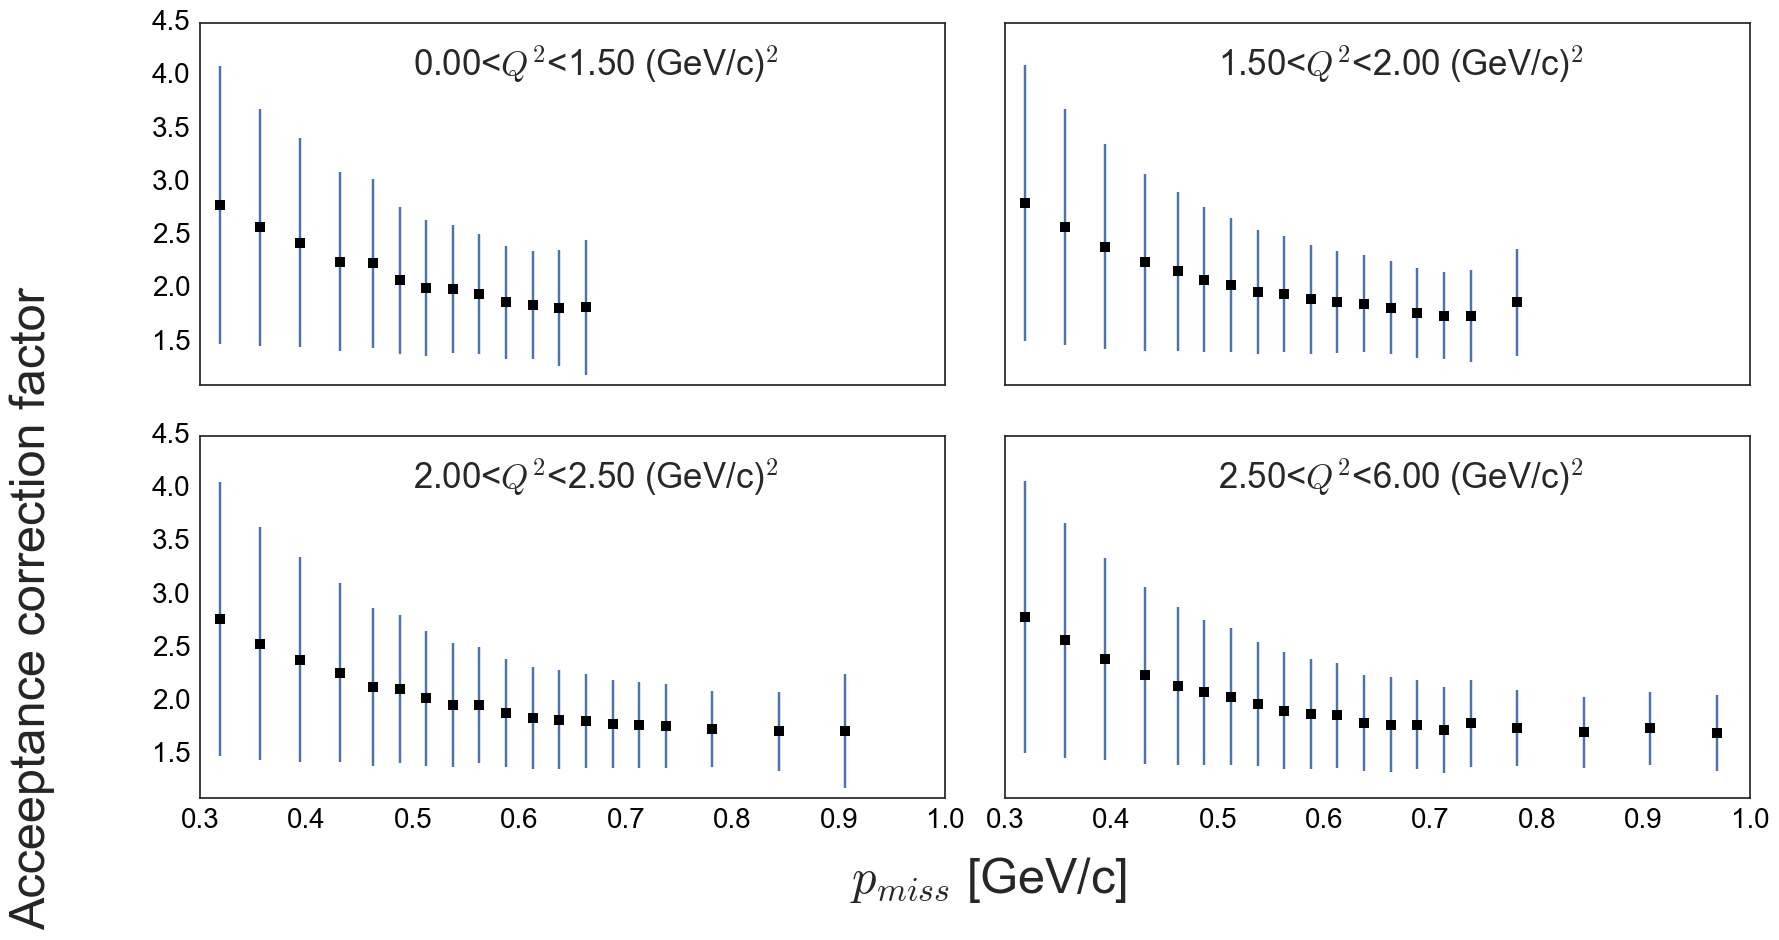

In [18]:
fig=plt.figure(figsize=(20,10))
for j in range( len(Q2Bins) ):
    ax = fig.add_subplot(2,2,j+1)
    Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]
    plt.plot(pmiss_bin_center,correction_q2pm[j], marker='s', color='black' ,linewidth=0)
    ax.errorbar(pmiss_bin_center,correction_q2pm[j],yerr=correction_err_q2pm[j],
                fmt=None, color='black',error_kw=dict(lw=2, capsize=5, capthick=2),label="%.2f<$Q^2$<%.2f (GeV/c)$^2$"%(Q2min,Q2max))
    if (j < len(Q2Bins)-2 ) :     
        ax.xaxis.set_major_formatter( NullFormatter() )
        ax.xaxis.set_major_locator( majorLocator )
    if (j==1 or j==3):     
        ax.yaxis.set_major_formatter( NullFormatter() )
    ax.set_ylim(1.1,4.5)
    set_axes(ax,x_label='',y_label='',fontsize=20)
    plt.text(0.5,4,"%.2f<$Q^2$<%.2f (GeV/c)$^2$"%(Q2min,Q2max),fontsize=25)

subplots_adjust(wspace=0.08,hspace=0.14)
figtext(0.45,0.03,"$p_{miss}$ [GeV/c]",fontdict={'fontsize':35})
figtext(0.03,0.6,"Acceeptance correction factor",fontdict={'fontsize':35},rotation=90)
plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/eepp_eep_correctionVsPmiss_Q2bins.pdf')


In [19]:
loss_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_analysis_bins) ))
loss_err_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_analysis_bins) ))
correction_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_analysis_bins) ))
correction_err_q2pm = np.zeros(( len(Q2Bins) , len(pmiss_analysis_bins) ))

for j in range( len(Q2Bins) ):
    Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]

    if do_plot:
        figure = plt.figure(figsize=(25,20))
    for i in range( len(pmiss_analysis_bins) ):
        pmin, pmax = pmiss_analysis_bins[i][0] , pmiss_analysis_bins[i][1]
        pmid = pmin+(pmax-pmin)/2

        loss_array = 0.5*(sims['fracLoss_pmiss_%.3f_%.3f_Q2bin_%.1f_%.1f'%(pmin , pmid , Q2min , Q2max)] + sims['fracLoss_pmiss_%.3f_%.3f_Q2bin_%.1f_%.1f'%(pmid , pmax , Q2min , Q2max)])
        weights = sims.PvalTotal_unweighted_12C
        loss_q2pm[j][i] = np.average(loss_array , weights=weights)
        loss_err_q2pm[j][i] = np.sqrt(np.average( np.square(loss_array - loss_q2pm[j][i]) , weights=weights) ) 
        correction_q2pm[j][i] = 1./(1-loss_q2pm[j][i])
        correction_err_q2pm[j][i] = loss_err_q2pm[j][i]/np.square(1-loss_q2pm[j][i])
        print 'loss for %.2f<Q2<%.2f, %.3f<p(miss)<%.3f (loss=%f, corecction=%f)'%(Q2min , Q2max ,pmin , pmax, loss_q2pm[j][i], correction_q2pm[j][i])

loss for 0.00<Q2<1.50, 0.300<p(miss)<0.375 (loss=0.626924, corecction=2.680420)
loss for 0.00<Q2<1.50, 0.375<p(miss)<0.450 (loss=0.572907, corecction=2.341409)
loss for 0.00<Q2<1.50, 0.450<p(miss)<0.500 (loss=0.536612, corecction=2.158017)
loss for 0.00<Q2<1.50, 0.500<p(miss)<0.550 (loss=0.501534, corecction=2.006156)
loss for 0.00<Q2<1.50, 0.550<p(miss)<0.600 (loss=0.477398, corecction=1.913503)
loss for 0.00<Q2<1.50, 0.600<p(miss)<0.650 (loss=0.455130, corecction=1.835300)
loss for 0.00<Q2<1.50, 0.650<p(miss)<0.700 (loss=0.226591, corecction=1.292977)
loss for 0.00<Q2<1.50, 0.700<p(miss)<0.750 (loss=0.000000, corecction=1.000000)
loss for 0.00<Q2<1.50, 0.750<p(miss)<0.875 (loss=1.000000, corecction=inf)
loss for 0.00<Q2<1.50, 0.875<p(miss)<1.000 (loss=1.000000, corecction=inf)
loss for 1.50<Q2<2.00, 0.300<p(miss)<0.375 (loss=0.628103, corecction=2.688920)
loss for 1.50<Q2<2.00, 0.375<p(miss)<0.450 (loss=0.569455, corecction=2.322640)
loss for 1.50<Q2<2.00, 0.450<p(miss)<0.500 (loss=0

In [30]:
def plot_correction_Q2bins(pmiss_bin_center=None,correction_q2pm=None,correction_err_q2pm=None,ymax=[4.5,7,7,6]):

    fig=plt.figure(figsize=(20,10))

    for j in range( len(Q2Bins) ):
        ax = fig.add_subplot(2,2,j+1)
        Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]
        
        plt.plot(pmiss_bin_center,correction_q2pm[j], marker='s', color='black' ,linewidth=0)
        ax.errorbar(pmiss_bin_center,correction_q2pm[j],yerr=correction_err_q2pm[j],
                    fmt=None, color='black',error_kw=dict(lw=2, capsize=5, capthick=2),label="%.2f<$Q^2$<%.2f (GeV/c)$^2$"%(Q2min,Q2max))
        if (j < len(Q2Bins)-2 ) :     
            ax.xaxis.set_major_formatter( NullFormatter() )
            ax.xaxis.set_major_locator( majorLocator )
#         if (j==1 or j==3):     
#             ax.yaxis.set_major_formatter( NullFormatter() )
        ax.set_ylim(1.1,ymax[j])
        set_axes(ax,x_label='',y_label='',fontsize=20)
        plt.text(0.45,0.85*ymax[j],"%.2f<$Q^2$<%.2f (GeV/c)$^2$"%(Q2min,Q2max),fontsize=25)

    subplots_adjust(wspace=0.08,hspace=0.2)
    figtext(0.45,0.03,"$p_{miss}$ [GeV/c]",fontdict={'fontsize':35})
    figtext(0.03,0.8,"Acceptance correction factor",fontdict={'fontsize':35},rotation=90)
    plt.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/eepp_eep_correctionVsPmiss_Q2bins.pdf')

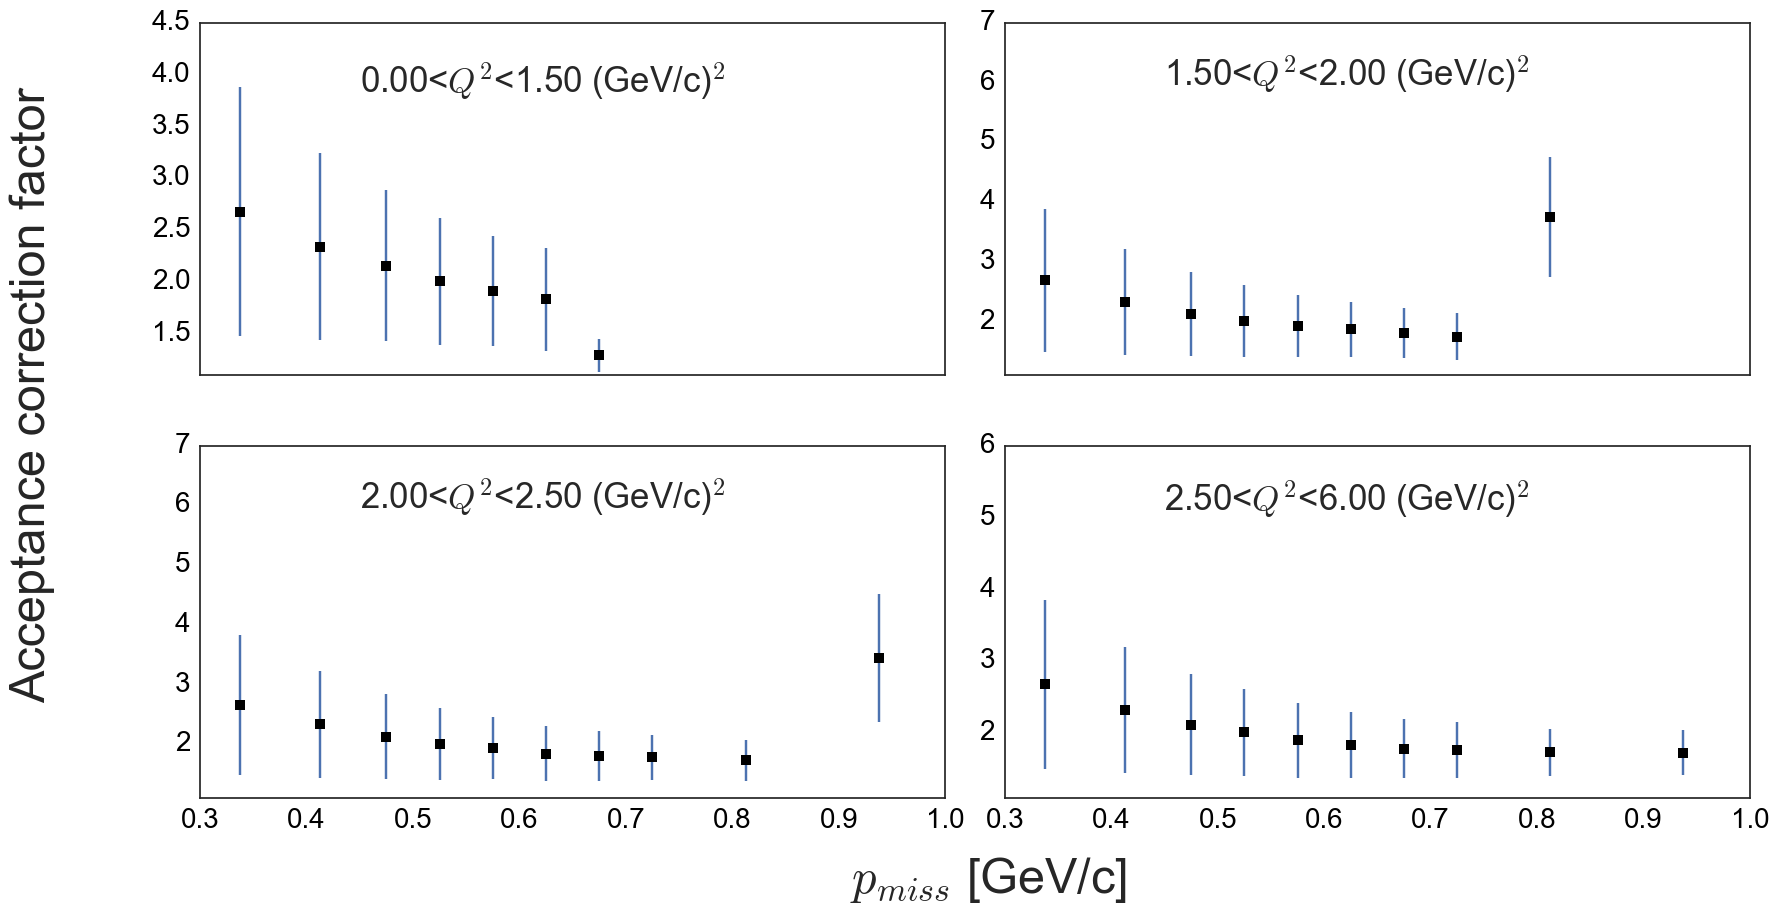

In [31]:
plot_correction_Q2bins(pmiss_bin_center=pmiss_analysis_bins_center,
                       correction_q2pm=correction_q2pm,
                       correction_err_q2pm=correction_err_q2pm);

In [23]:
def plot_eepp_eep_ratio_Q2bins(target = 'C12', name = '$^{12}$C', A=12, Z=6,                               
                               correction_q2pm=None , correction_err_q2pm=None ,                                
                               pmiss_multiples_bins=None, pmiss_bin_center=None,                               
                               do_print=False,                               
                               do_subplots=False,
                               do_add_horizontal_scalar_line=True,
                               ymax = 80,
                               loc='best'):
    
    eep = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_ppSRCCut_DATA_%s.root'%target , 'anaTree')
    eepp = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_DATA_%s.root'%target , 'anaTree')

    rows,cols=len(Q2Bins) , len(pmiss_multiples_bins)
    eep_in_bin , eepp_in_bin = np.zeros((rows,cols)) , np.zeros((rows,cols))
    ratio , ratio_err = -100*np.zeros((rows,cols)) , -100*np.zeros((rows,cols))
    ratio_corrected , ratio_corrected_err = np.zeros((rows,cols)) , np.zeros((rows,cols))
  
    Tp_Tpp_ratio ,Tp_Tpp_err = Tp[target]/Tpp[target] , sqrt( np.square(Tp[target+'err']/Tp[target])+np.square(Tpp[target+'err']/Tpp[target]) )
    Tpp_Tp_ratio ,Tpp_Tp_err = Tpp[target]/Tp[target] , Tpp[target]/Tp[target] * sqrt( np.square(Tp[target+'err']/Tp[target])+np.square(Tpp[target+'err']/Tpp[target]) )



    pmiss_bin_width = []
    for j in range( len(Q2Bins) ):
        Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]
        q2_cut = ROOT.TCut("%f<Q2 && Q2<%f"%(Q2min , Q2max))


        for i in range( len(pmiss_multiples_bins) ):
            pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
            if j==0: pmiss_bin_width.append( 0.5*(pmax - pmin) )
            pmiss_cut = ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))
            eep_in_bin[j][i] = eep.GetEntries(pmiss_cut+q2_cut)
            eepp_in_bin[j][i] = eepp.GetEntries(pmiss_cut+q2_cut)
            ratio[j][i] = 100*float(eepp_in_bin[j][i])/eep_in_bin[j][i] if eep_in_bin[j][i]>0 else -100
            ratio_err[j][i] = ratio[j][i] * np.sqrt(1./eepp_in_bin[j][i] + 1./eep_in_bin[j][i]) if eep_in_bin[j][i]>0 else -100
            ratio_corrected[j][i] = ratio[j][i] * correction_q2pm[j][i]  
            ratio_corrected_err[j][i] = ratio_corrected[j][i] * np.sqrt(
                np.square(ratio_err[j][i]/ratio[j][i]) 
                + np.square(correction_err_q2pm[j][i]/correction_q2pm[j][i]))

            if do_print: print 'ratio for %.2f<$Q^2$<%.2f and %.3f<p(miss)<%.3f = %.3f+/-%.3f'%(Q2min , Q2max,pmin , pmax,ratio[j][i],ratio_err[j][i])
    

    eep.Close()
    eepp.Close()
    if do_subplots:
        fig = plt.figure(figsize=(15,20))
    else:
        fig,ax = plt.subplots(figsize=(10,10))
    for j in range( len(Q2Bins) ):
        Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]
        if do_subplots: 
            ax = fig.add_subplot(4,1,j+1)
            set_axes(ax , x_label='',y_label='')
            ax.grid()
            ax.set_ylim(1,ymax[j])
            ax.set_xlim(0.25,1.01)
            if j<3: ax.xaxis.set_major_formatter( NullFormatter() )
            plt.text(0.3,0.8*ymax[j],"%.2f<$Q^2$<%.2f (GeV/c)$^2$"%(Q2min,Q2max),fontsize=30)
            
     
        plt.errorbar(pmiss_bin_center,ratio_corrected[j],xerr=pmiss_bin_width,yerr=ratio_corrected_err[j],fmt='o',label="%.2f<$Q^2$<%.2f (GeV/c)$^2$"%(Q2min,Q2max))

    if do_add_horizontal_scalar_line:
        x = contact['k[GeV/c]']
        numer = 100*Tpp_Tp_ratio*(sigmap2sigman + Pscx[target]*4)
        denom = sigmap2sigman*(1+4)
        y = (x/x)*numer/denom
#         plt.plot(x,y,'--',linewidth=3,label='Scalar Dominance')


    if do_subplots:
        subplots_adjust(wspace=0.08,hspace=0.01)
        figtext(0.45,0.07,"$p_{miss}$ [GeV/c]",fontdict={'fontsize':35})
        figtext(0.01,0.6,r"%s ${\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]',fontdict={'fontsize':35},rotation=90)
    if not do_subplots:
        set_axes(ax , x_label='$p_{miss}$ [GeV/c]',y_label="%s ${\\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
        ax.set_xlim(0.25,1.01)
        ax.set_ylim(1,ymax)
        ax.grid()
        plt.legend(fontsize=25,loc=loc)
    fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/eepp_eep_acceptanceCorrected_Q2bins_%s.pdf'%target)
    
    
    
    # plot also the uncorrected ratio
    fig2,ax2 = plt.subplots(figsize=(10,10))
    for j in range( len(Q2Bins) ):
        Q2min , Q2max = Q2Bins[j][0] , Q2Bins[j][1]
        plt.errorbar(pmiss_bin_center,ratio[j],xerr=pmiss_bin_width,yerr=ratio_err[j],fmt='o',label="%.2f<$Q^2$<%.2f (GeV/c)$^2$"%(Q2min,Q2max))
    set_axes(ax2 , x_label='$p_{miss}$ [GeV/c]',y_label="%s ${\\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
    ax2.set_xlim(0.25,1.01)
    ax2.set_ylim(1,ymax)
    ax2.grid()
    plt.legend(fontsize=25,loc=loc)
    fig2.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/eepp_eep_NotAcceptanceCorrected_Q2bins_%s.pdf'%target)



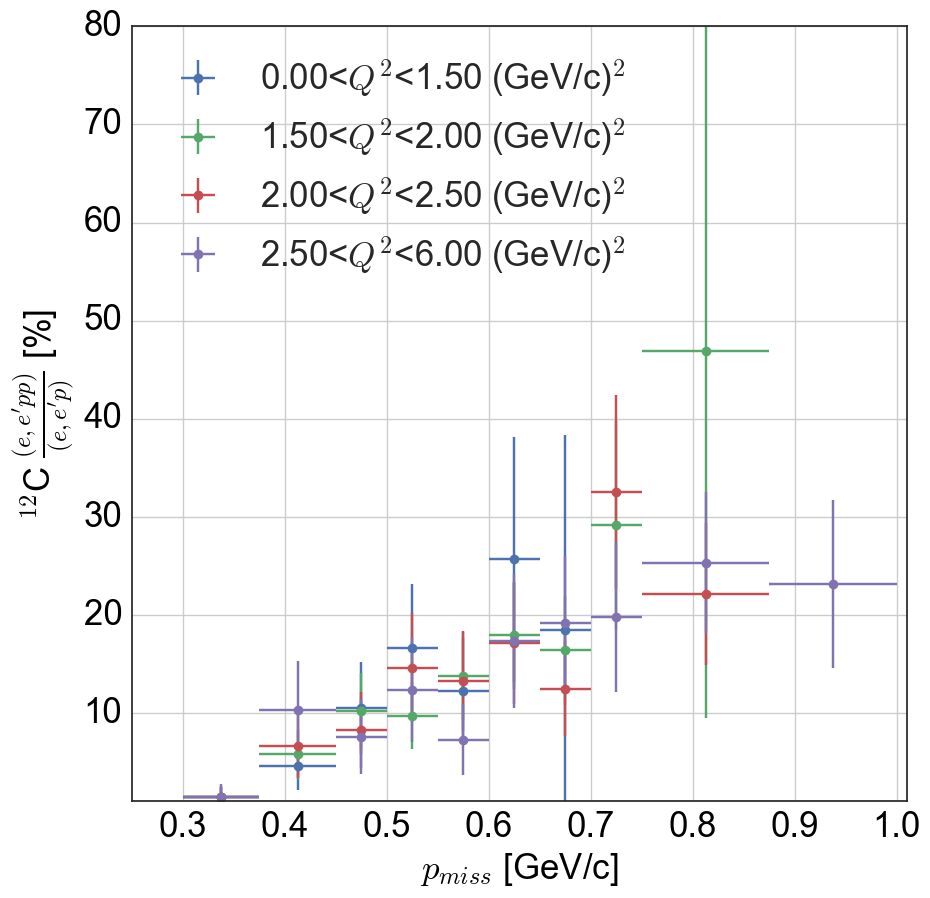

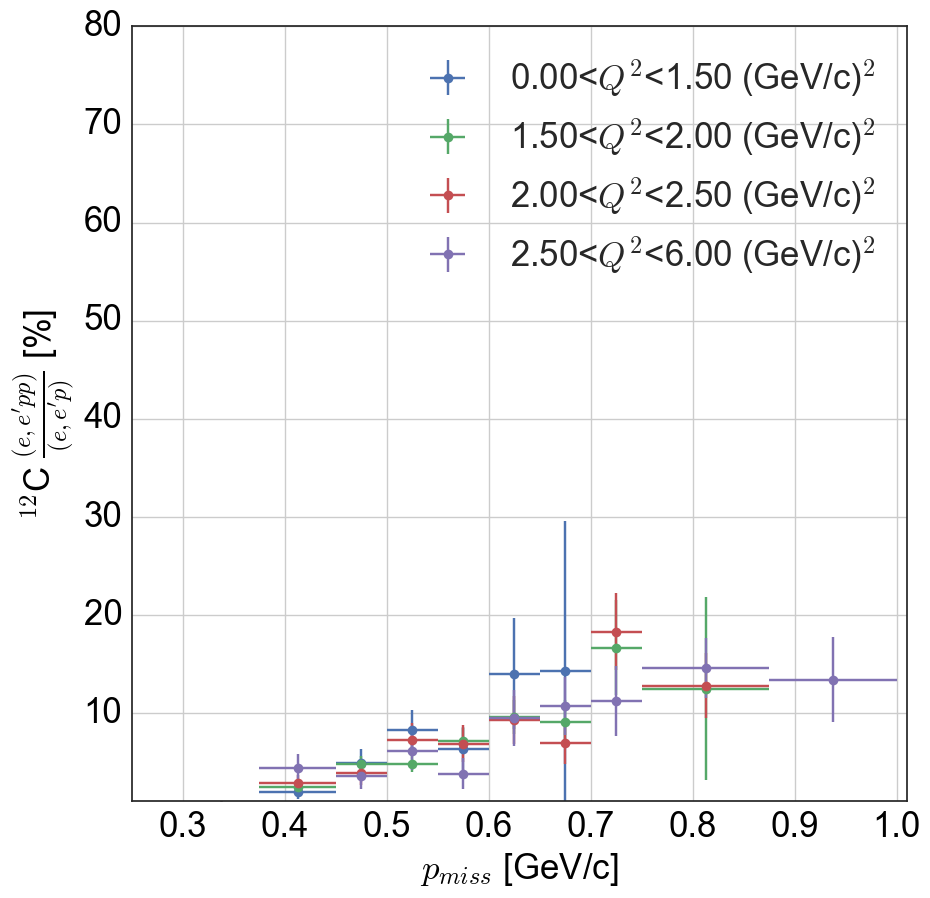

In [24]:
plot_eepp_eep_ratio_Q2bins(target='C12', name='$^{12}$C',
                           correction_q2pm=correction_q2pm , correction_err_q2pm=correction_err_q2pm,
                           pmiss_multiples_bins=pmiss_analysis_bins, pmiss_bin_center=pmiss_analysis_bins_center,                               
                           do_print = False,
                          ymax=80)

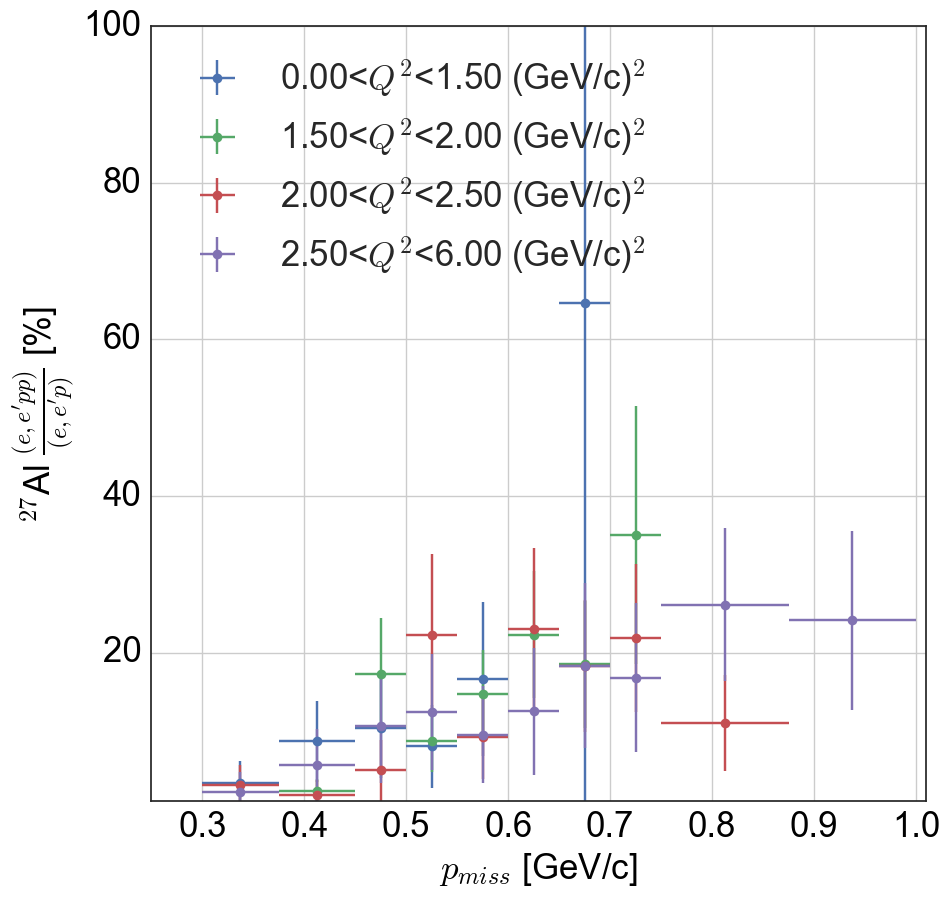

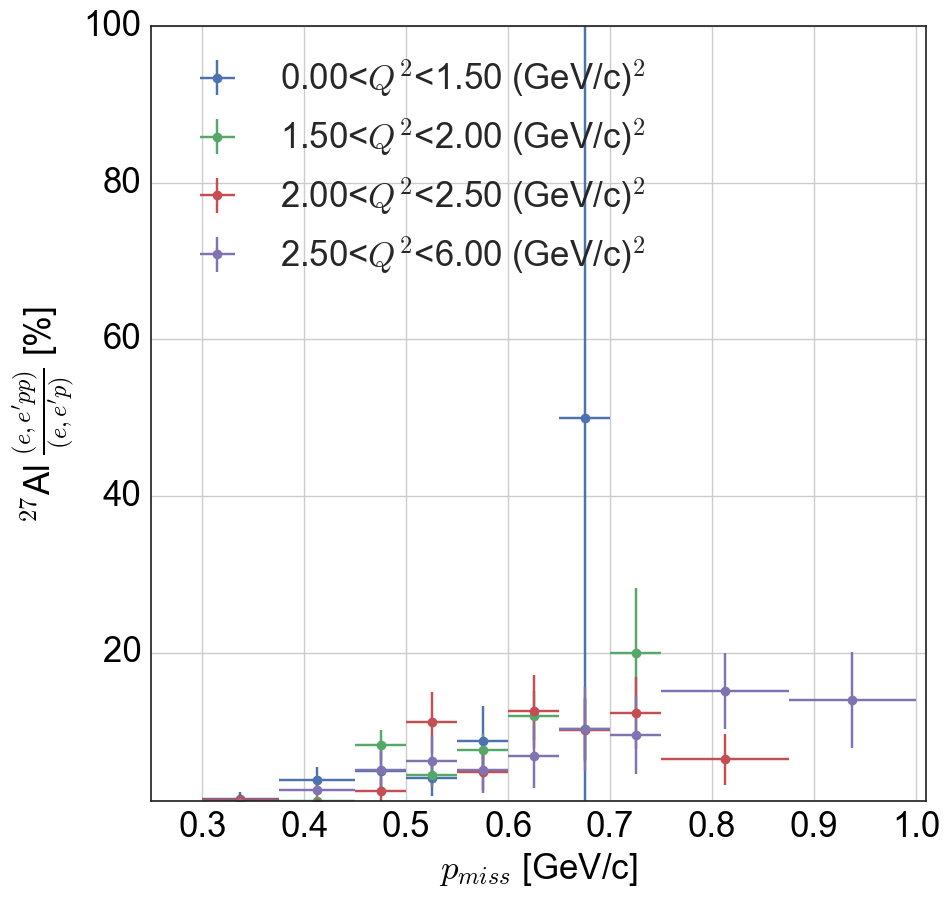

In [25]:
plot_eepp_eep_ratio_Q2bins(target='Al27', name='$^{27}$Al',
                           correction_q2pm=correction_q2pm , correction_err_q2pm=correction_err_q2pm,
                           pmiss_multiples_bins=pmiss_analysis_bins, pmiss_bin_center=pmiss_analysis_bins_center,                               
                           ymax=100,
                           loc='upper left',
                           do_print = False)

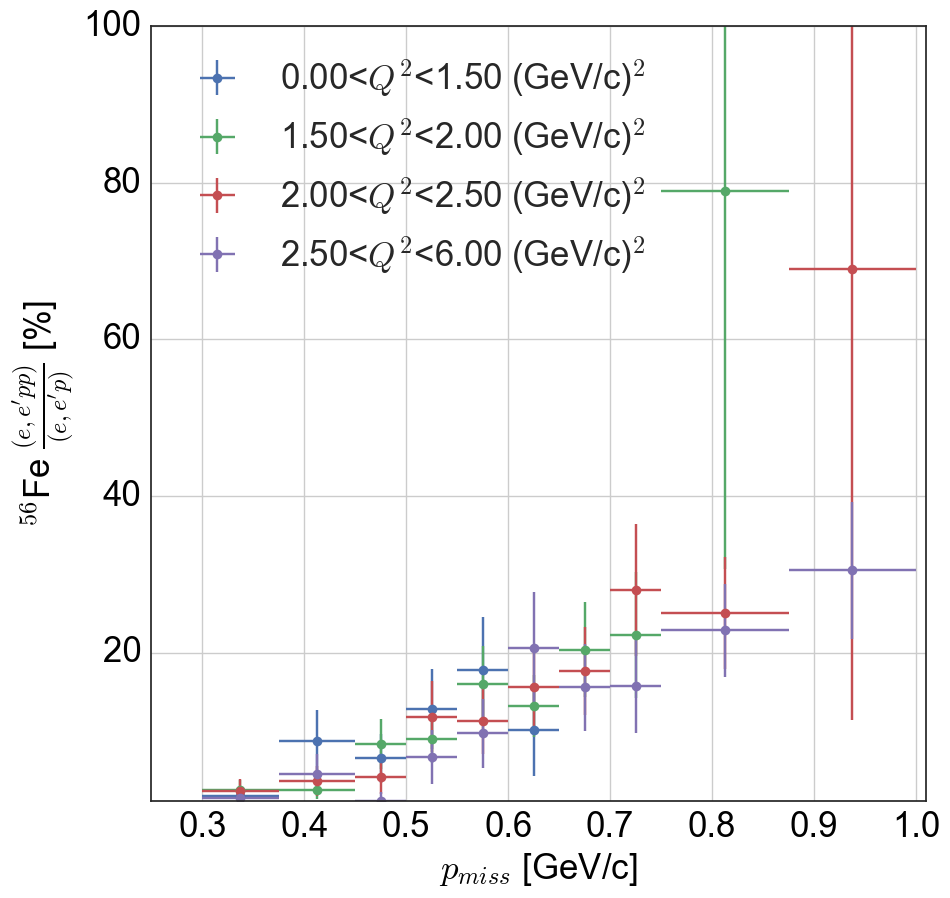

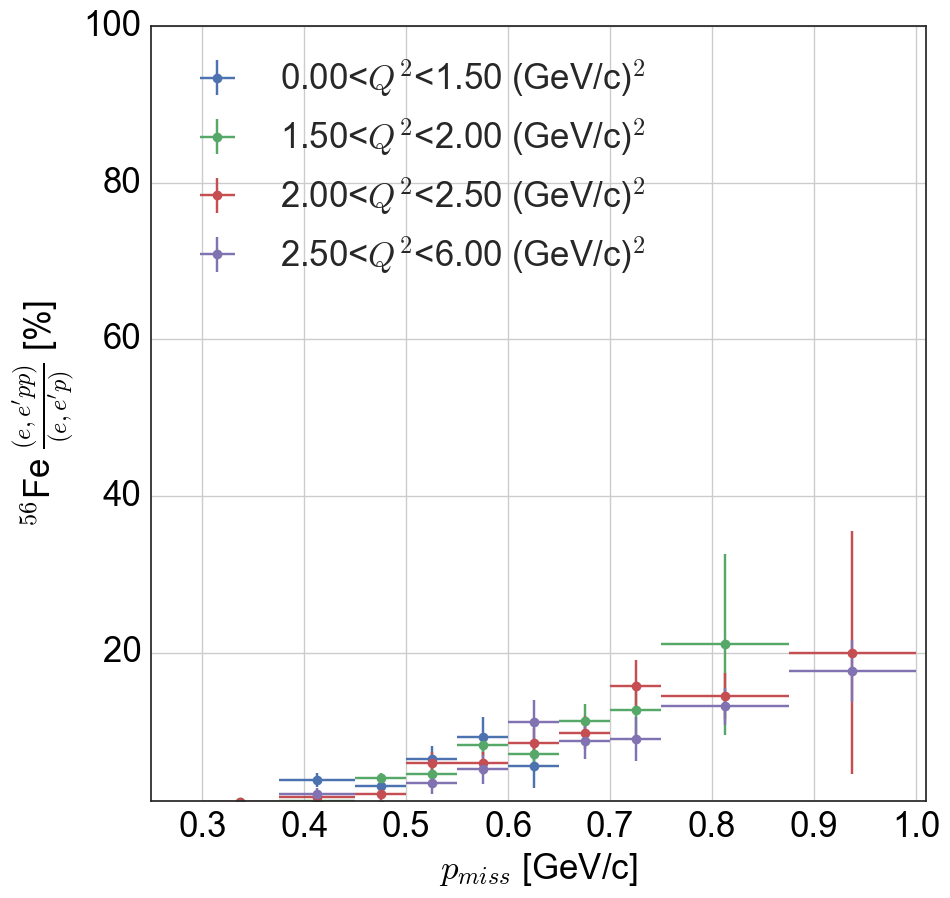

In [26]:
plot_eepp_eep_ratio_Q2bins(target='Fe56', name='$^{56}$Fe',
                           correction_q2pm=correction_q2pm , correction_err_q2pm=correction_err_q2pm,
                           pmiss_multiples_bins=pmiss_analysis_bins, pmiss_bin_center=pmiss_analysis_bins_center,                               
                           ymax=100,
                           loc='upper left',
                           do_print = False)

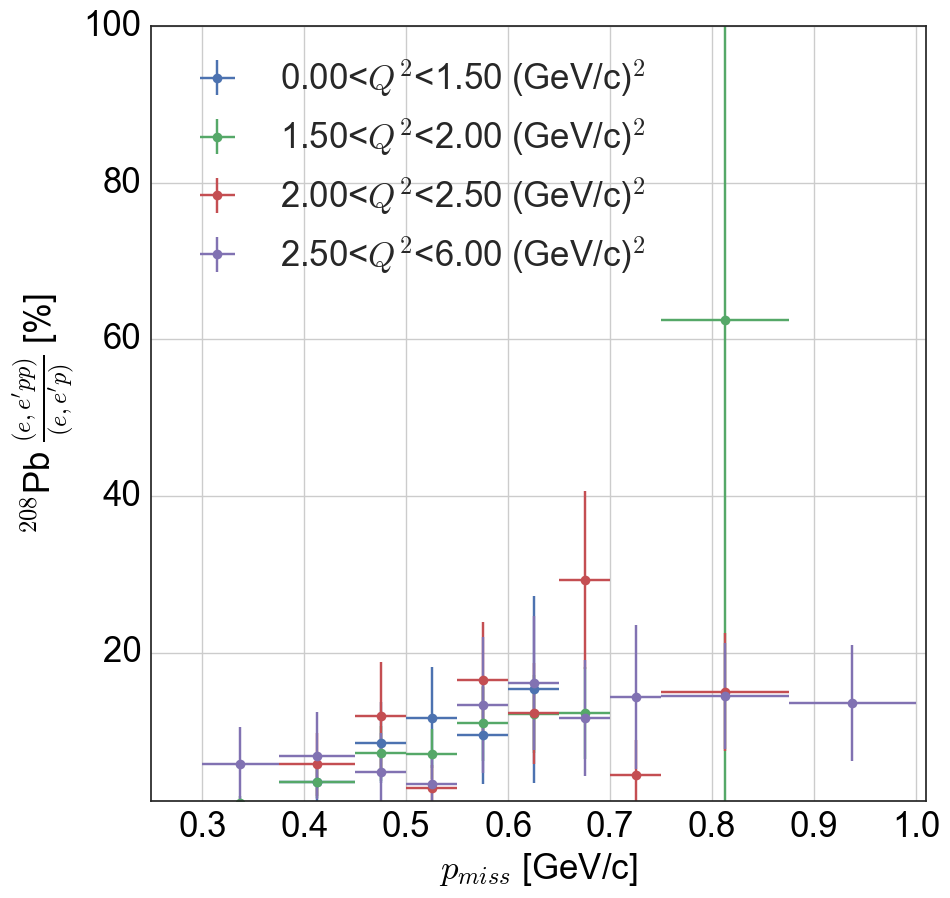

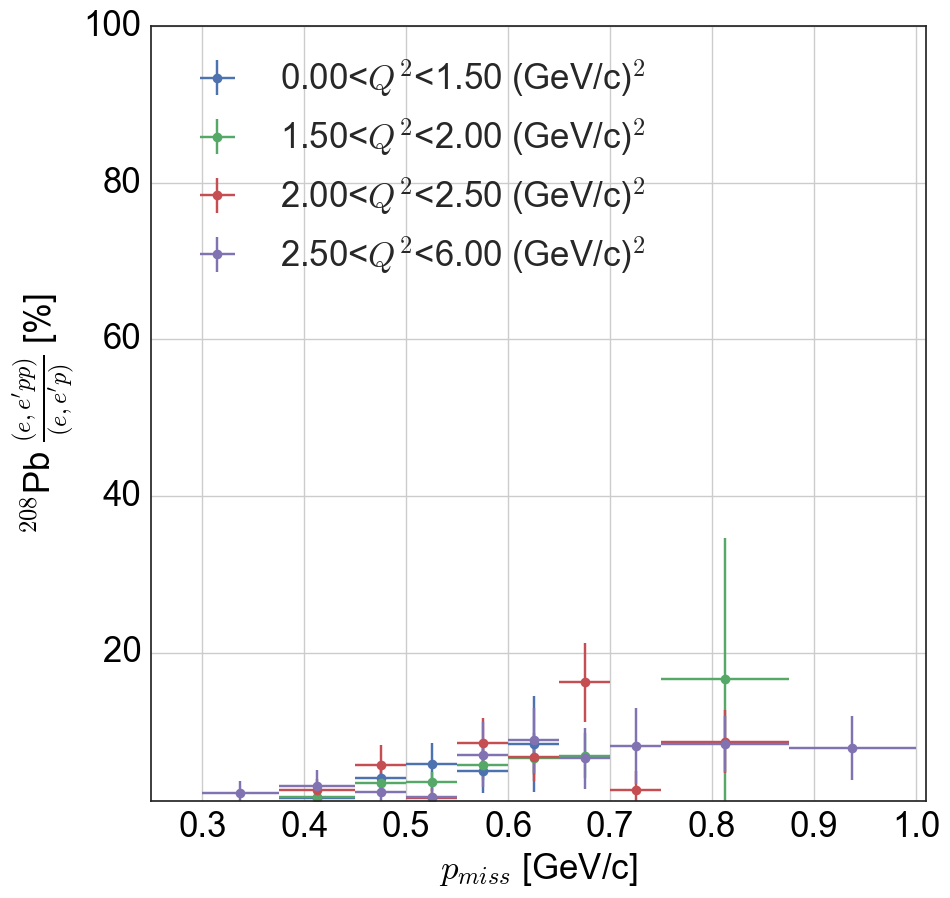

In [27]:
plot_eepp_eep_ratio_Q2bins(target='Pb208', name='$^{208}$Pb',
                           correction_q2pm=correction_q2pm , correction_err_q2pm=correction_err_q2pm,
                           pmiss_multiples_bins=pmiss_analysis_bins, pmiss_bin_center=pmiss_analysis_bins_center,                               
                           ymax=100,
                           loc='upper left',
                           do_print = False)

# all 4 targets superimposed

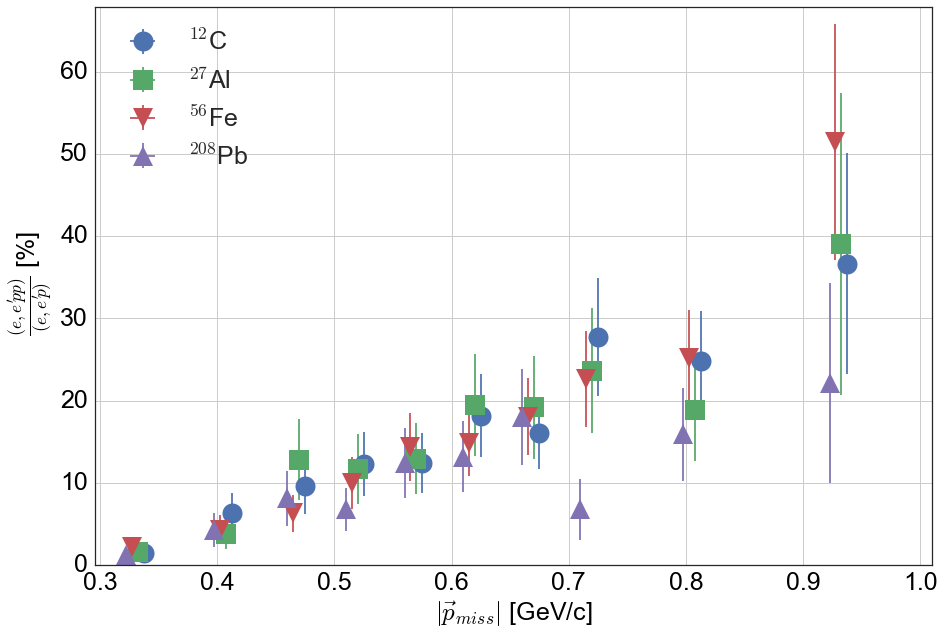

In [28]:
do_add_horizontal_scalar_line = False
fig,ax = plt.subplots(figsize=(15,10))
for target,name,i,fmt in zip(['C12','Al27','Fe56','Pb208'],['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'],[0,1,2,3],['o','s','v','^']):
    bin_center , bin_width , R , R_err = plot_eepp_eep_ratio(target=target,
                                                             correction=correction, 
                                                             pmiss_multiples_bins=pmiss_analysis_bins, 
                                                             pmiss_bin_center=pmiss_analysis_bins_center,                   
                                                             do_save_plots=False)
    plt.errorbar(bin_center-0.005*i*np.ones(len(bin_center)),R,xerr=np.zeros(len(bin_width)),yerr=R_err,
                 fmt=fmt,label=name,markersize=20)
    
    if do_add_horizontal_scalar_line:
        x = contact['k[GeV/c]']
        numer = 100*Tpp_Tp_ratio*(sigmap2sigman + Pscx[target]*4)
        denom = sigmap2sigman*(1+4)
        y = (x/x)*numer/denom
        plt.plot(x,y,'--',linewidth=3,label='Scalar Dominance')


set_axes(ax , x_label=r'$|\vec{p}_{miss}|$ [GeV/c]',y_label= r" ${\frac{(e,e'pp)}{(e,e'p)}}$ [%]")
ax.grid()
ax.set_xlim(0.296,1.01)
ax.set_ylim(0.,68)
plt.legend(loc='best',fontsize=25)
fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/eepp_eep_Corrected_allnuclei.pdf')

# in bins of theta_pmiss_q and p(miss) - correction only in bins of p(miss) since I need to run all simualtions from scratch to get corrections in bins of \theta(p(miss),q)

In [21]:
thetapmqBins = [[100,135] , [135,145], [145,155], [155,180]]
PmissBins = [[0.3,0.45] , [0.45,0.55] , [0.55,0.65] , [0.65,0.75] , [0.75,1.0]]
thetapmq_bin_center = [] 
for j in range( len(thetapmqBins) ):
    thetapmqmin , thetapmqmax = thetapmqBins[j][0] , thetapmqBins[j][1]
    thetapmq_bin_center.append(0.5*(thetapmqmin+thetapmqmax))
print 'thetapmq_bin_center:',thetapmq_bin_center

thetapmq_bin_center: [117.5, 140.0, 150.0, 167.5]


In [39]:
def plot_eepp_eep_ratio_theta_pmiss_q_bins(target = 'C12', name = '$^{12}$C',                            
                               pmiss_multiples_bins=None, pmiss_bin_center=None,                               
                               do_print=False,                               
                               ymax = 80,
                               loc='best'):
    
    eep = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_eep_in_ppSRCCut_DATA_%s.root'%target , 'anaTree')
    eepp = TPlots('/Users/erezcohen/Desktop/DataMining/AnaFiles/Ana_ppSRCCut_DATA_%s.root'%target , 'anaTree')

    rows,cols=len(thetapmqBins) , len(pmiss_multiples_bins)
    eep_in_bin , eepp_in_bin = np.zeros((rows,cols)) , np.zeros((rows,cols))
    ratio , ratio_err = -100*np.zeros((rows,cols)) , -100*np.zeros((rows,cols))
    ratio_corrected , ratio_corrected_err = np.zeros((rows,cols)) , np.zeros((rows,cols))
  
    pmiss_bin_width = []
    for j in range( len(thetapmqBins) ):
        thetapmqmin , thetapmqmax = thetapmqBins[j][0] , thetapmqBins[j][1]
        theta_cut = ROOT.TCut("%f<TMath::RadToDeg()*theta_miss_q && TMath::RadToDeg()*theta_miss_q<%f"%(thetapmqmin , thetapmqmax))

        for i in range( len(pmiss_multiples_bins) ):
            pmin , pmax = pmiss_multiples_bins[i][0] , pmiss_multiples_bins[i][1]
            if j==0: pmiss_bin_width.append( 0.5*(pmax - pmin) )
            pmiss_cut = ROOT.TCut("%f<Pmiss3Mag && Pmiss3Mag<%f"%(pmin , pmax))
            eep_in_bin[j][i] = eep.GetEntries(pmiss_cut+theta_cut)
            eepp_in_bin[j][i] = eepp.GetEntries(pmiss_cut+theta_cut)
            ratio[j][i] = 100*float(eepp_in_bin[j][i])/eep_in_bin[j][i] if eep_in_bin[j][i]>0 else -100
            ratio_err[j][i] = ratio[j][i] * np.sqrt(1./eepp_in_bin[j][i] + 1./eep_in_bin[j][i]) if eep_in_bin[j][i]>0 else -100
            ratio_corrected[j][i] = ratio[j][i] * correction[i]
            ratio_corrected_err[j][i] = ratio_corrected[j][i] * np.sqrt( np.square(ratio_err[j][i]/ratio[j][i])+
                                                                        np.square(correction_err[i]/correction[i]))

            if do_print: print 'ratio for %.2f<$\\theta(p(miss),q)$<%.2f and %.3f<p(miss)<%.3f = %.3f+/-%.3f'%(thetapmqmin , thetapmqmax , pmin , pmax , ratio_corrected[j][i],ratio_corrected_err[j][i])
    eep.Close()
    eepp.Close()
    
    fig,ax = plt.subplots(figsize=(10,10))
    for j in range( len(thetapmqBins) ):
        thetapmqmin , thetapmqmax = thetapmqBins[j][0] , thetapmqBins[j][1]
        plt.errorbar(pmiss_bin_center,ratio_corrected[j],xerr=pmiss_bin_width,yerr=ratio_corrected_err[j],fmt='o',label="%.0f<$\\theta_{p_{miss},q}$<%.0f [deg.]"%(thetapmqmin , thetapmqmax))

    set_axes(ax , x_label='$p_{miss}$ [GeV/c]',y_label="%s ${\\frac{(e,e'pp)}{(e,e'p)}}$"%name + ' [%]')
    ax.set_xlim(0.25,1.01)
    ax.set_ylim(1,ymax)
    ax.grid()
    plt.legend(fontsize=25,loc=loc)
    fig.savefig('/Users/erezcohen/Desktop/DataMining/ppSRCAnalysisNote/chapter9/figures/eepp_eep_acceptanceCorrected_theta_pmiss_q_bins_%s.pdf'%target)

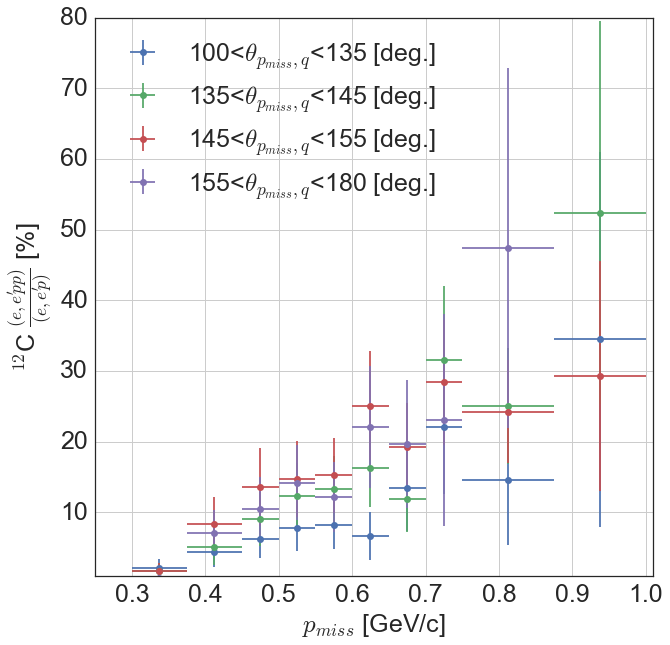

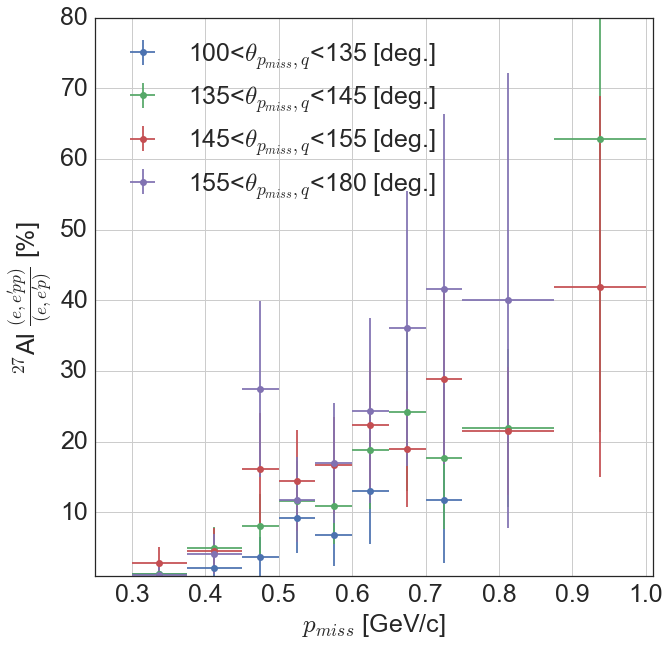

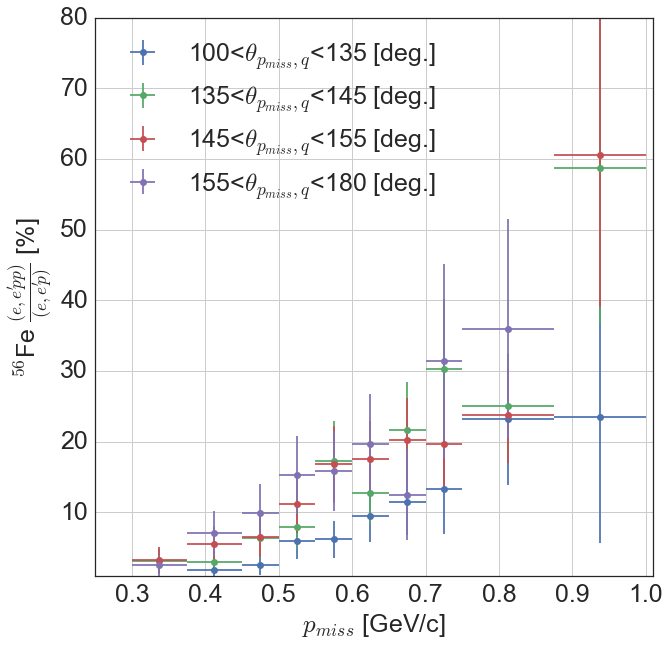

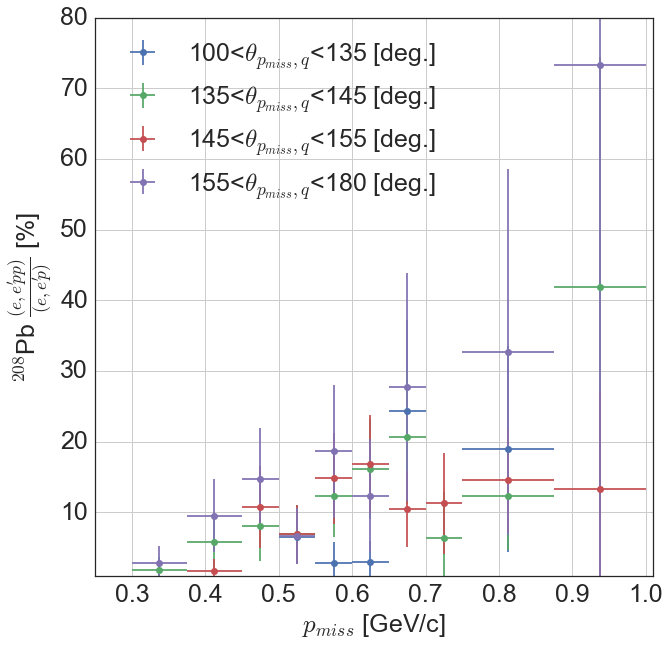

In [42]:
for target,name in zip(['C12','Al27','Fe56','Pb208'],['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):
    plot_eepp_eep_ratio_theta_pmiss_q_bins(target=target, name=name,
                                           pmiss_multiples_bins=pmiss_analysis_bins, pmiss_bin_center=pmiss_analysis_bins_center,                                                          
                                           ymax=80)